# Unraveling Real Estate Ads

### Getting Started 

Load the Real Estate Ads dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [257]:
import json

import datetime
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from pandas_profiling import ProfileReport

from pandas.io.json import json_normalize #package for flattening json in pandas df

# Import seaborn for some visualizations
import seaborn as sns

import matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the Real Estate Ads dataset
try:
    data = pd.read_csv("dataset.csv")
    data.drop(['Unnamed: 0'], axis = 1, inplace = True)
    print("Real Estate Ads dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

### Data Exploration

In [2]:
display(data.head())

error  uf  longitude                                                url  \
0    []  PR -49.278522  http://www.redebee.com.br/imovel/apartamento-r...   
1    []  PR -49.280365  http://www.redebee.com.br/imovel/studio-reside...   
2    []  PR -49.349094  http://www.redebee.com.br/imovel/casa-residenc...   
3    []  PR -49.350033  http://www.redebee.com.br/imovel/casa-residenc...   
4    []  PR -49.236857  http://www.redebee.com.br/imovel/loja-comercia...   

   condominio    cidade_uf         default  area_util  area_total  \
0       590.0  curitiba_pr  ['finalidade']      131.0       131.0   
1       356.0  curitiba_pr  ['finalidade']       36.0        69.0   
2       400.0  curitiba_pr  ['finalidade']        NaN         NaN   
3       620.0  curitiba_pr  ['finalidade']        NaN         NaN   
4         NaN  curitiba_pr  ['finalidade']       23.0        23.0   

  contato_imobiliaria  ...  area_comum  seguro_incendio  email_corretor  \
0     (41) 99165-0629  ...         NaN              NaN             NaN   
1     (41) 99165-0629  ...         NaN              NaN             NaN   
2     (41) 99165-0629  ...         NaN              NaN             NaN   
3     (41) 99165-0629  ...         NaN              NaN             NaN   
4     (41) 99165-0629  ...         NaN              NaN             NaN   

  nome_contato  numero_contato_imagem complemento  terreno_fundo  \
0          NaN                    NaN         NaN            NaN   
1          NaN                    NaN         NaN            NaN   
2          NaN                    NaN         NaN            NaN   
3          NaN                    NaN         NaN            NaN   
4          NaN                    NaN         NaN            NaN   

   terreno_frente terreno_esquerda testada  
0             NaN              NaN     NaN  
1             NaN              NaN     NaN  
2             NaN              NaN     NaN  
3             NaN              NaN     NaN  
4             NaN              NaN     NaN  

[5 rows x 63 columns]

Checking the information for each column.

Generating the pandas report for the dataset still complete.

In [199]:
#profile = ProfileReport(data, title='Real Estate Ads Profiling Report 2', html={'style':{'full_width':True}})

In [200]:
#profile.to_notebook_iframe()

Saving the report

In [201]:
#profile.to_file(output_file="real_estate_ads_report_2.html")

### Cleaning dataset

##### error Column

In [18]:
for i in range(len(data)):
    if data.iloc[i].error == '[]':
        data.loc[i, 'error'] = '_'
    else:
        x = data.iloc[i].error.replace("'", '"')
        y = json.loads(x)
        w = json_normalize(y[0])
        data.loc[i, 'error'] = w.columns[0]

In [360]:
data.error

0         0
1         0
2         0
3         0
4         0
         ..
149963    0
149964    0
149965    0
149966    0
149967    0
Name: error, Length: 149968, dtype: int64

In [20]:
data.error.value_counts()

_             141044
zoneamento      7409
bairro           996
Finalidade       519
Name: error, dtype: int64

In [26]:
data['error'] = data['error'].map({'_':0,'zoneamento':1,'bairro':2,'Finalidade':3})

In [150]:
data.head()

error  longitude                                                url  \
0      0 -49.278522  http://www.redebee.com.br/imovel/apartamento-r...   
1      0 -49.280365  http://www.redebee.com.br/imovel/studio-reside...   
2      0 -49.349094  http://www.redebee.com.br/imovel/casa-residenc...   
3      0 -49.350033  http://www.redebee.com.br/imovel/casa-residenc...   
4      0 -49.236857  http://www.redebee.com.br/imovel/loja-comercia...   

   condominio  default  area_util  area_total contato_imobiliaria      valor  \
0       590.0        1      131.0       131.0     (41) 99165-0629     1590.0   
1       356.0        1       36.0        69.0     (41) 99165-0629     1200.0   
2       400.0        1        NaN         NaN     (41) 99165-0629   714200.0   
3       620.0        1        NaN         NaN     (41) 99165-0629  1577800.0   
4         NaN        1       23.0        23.0     (41) 99165-0629      650.0   

   isportal  ...  anunciante.nome area_construida  suite area_terreno  \
0     False  ...         Rede Bee             NaN    NaN          NaN   
1     False  ...         Rede Bee             NaN    NaN          NaN   
2     False  ...         Rede Bee           126.0    1.0        121.0   
3     False  ...         Rede Bee           244.0    2.0        526.0   
4     False  ...         Rede Bee             NaN    NaN          NaN   

   area_privativa  cep numero_corretor area_comum  nome_contato  \
0             NaN  NaN             NaN        NaN           NaN   
1             NaN  NaN             NaN        NaN           NaN   
2             NaN  NaN             NaN        NaN           NaN   
3             NaN  NaN             NaN        NaN           NaN   
4             NaN  NaN             NaN        NaN           NaN   

  numero_contato_imagem  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 49 columns]

##### uf Column

In [5]:
print(data.uf.value_counts())
data.drop(columns=['uf'], inplace=True)

PR    149968
Name: uf, dtype: int64


##### longitude Column

In [54]:
data.longitude.describe()

count    119632.000000
mean        -49.283380
std           1.056162
min        -100.000000
25%         -49.299570
50%         -49.279824
75%         -49.256148
max          49.313489
Name: longitude, dtype: float64

In [260]:
data[data.longitude.isna()]

error  longitude     url  condominio  default  area_util  area_total  \
6492        0        NaN   18058         NaN        1        NaN         NaN   
6493        0        NaN   18055         NaN        1        NaN         NaN   
6495        0        NaN   18050         NaN        1        NaN         NaN   
7274        0        NaN   18048         NaN        1        NaN         NaN   
7275        0        NaN   18049         NaN        1        NaN         NaN   
...       ...        ...     ...         ...      ...        ...         ...   
149888      0        NaN   74557       365.0        0       89.0        89.0   
149892      0        NaN  101535       330.0        0       67.0       106.0   
149925      0        NaN   70758         0.0        0       48.0         NaN   
149932      0        NaN   77609       450.0        1       60.0        71.0   
149965      0        NaN  116612         0.0        0      226.0       450.0   

       contato_imobiliaria     valor  isportal  ...  \
6492                   NaN    1500.0         0  ...   
6493                   NaN     750.0         0  ...   
6495                   NaN     700.0         0  ...   
7274                   NaN     500.0         0  ...   
7275                   NaN     500.0         0  ...   
...                    ...       ...       ...  ...   
149888                 NaN  300000.0         1  ...   
149892                 NaN  298000.0         1  ...   
149925                 NaN  299000.0         1  ...   
149932                 NaN  299990.0         1  ...   
149965                 NaN    2490.0         1  ...   

                                          anunciante.nome area_construida  \
6492                                                 Guth           130.0   
6493                                                 Guth            40.0   
6495                                                 Guth            40.0   
7274                                                 Guth            44.0   
7275                                                 Guth            40.0   
...                                                   ...             ...   
149888                 RR MUSSI IMOVEIS EIRELI - VivaReal             NaN   
149892                      Luiz Raphael Gomes - VivaReal             NaN   
149925                Cleiton José de Oliveira - VivaReal             NaN   
149932                     Eliel Nunes Pereira - VivaReal             NaN   
149965  Jamaica Empreendimentos Imobiliários Ltda-EPP ...             NaN   

        suite  area_terreno  area_privativa  cep numero_corretor  area_comum  \
6492      1.0           NaN             NaN  NaN             NaN         NaN   
6493      0.0           NaN             NaN  NaN             NaN         NaN   
6495      0.0           NaN             NaN  NaN             NaN         NaN   
7274      0.0           NaN             NaN  NaN             NaN         NaN   
7275      0.0           NaN             NaN  NaN             NaN         NaN   
...       ...           ...             ...  ...             ...         ...   
149888    0.0           NaN             NaN  NaN             NaN         NaN   
149892    1.0           NaN             NaN  NaN             NaN         NaN   
149925    0.0           NaN             NaN  NaN             NaN         NaN   
149932    0.0           NaN             NaN  NaN             NaN         NaN   
149965    1.0           NaN             NaN  NaN             NaN         NaN   

       nome_contato numero_contato_imagem  
6492            NaN                   NaN  
6493            NaN                   NaN  
6495            NaN                   NaN  
7274            NaN                   NaN  
7275            NaN                   NaN  
...             ...                   ...  
149888          NaN                   NaN  
149892          NaN                   NaN  
149925          NaN                   NaN  
149932          NaN                   NaN  
149965          

In [349]:
data.drop(columns=['longitude'], inplace=True)

##### url Column

In [352]:
data[data['url'].isna()]

Empty DataFrame
Columns: [error, url, condominio, default, area_util, area_total, valor, isportal, isparticular, banheiro, tipo_negocio, quarto, title, opcionais, latitude, descricao, lista_fotos, garagem, iptu, data_inclusao, codigo, finalidade, geohash, tipo_imovel, endereco, geometry.coordinates, scraping.spider_name, scraping.padrao, bairro.id, zoneamento.id, anunciante.id, area_construida, suite, area_terreno, area_privativa, cep, numero_corretor, area_comum, nome_contato, numero_contato_imagem]
Index: []

[0 rows x 40 columns]

In [353]:
lb_make = LabelEncoder()
data['url'] = lb_make.fit_transform(data['url'])
data['url'].head()

0    27746
1    29335
2    28173
3    28229
4    28687
Name: url, dtype: int32

##### condominio Column

In [51]:
data.loc[((data.condominio <= 1) & (data.condominio != 0.00)) | (data.condominio >= 3000000)]

error  longitude                                                url  \
126         0 -49.253700  http://www.redebee.com.br/imovel/studio-reside...   
148         0 -49.270265  https://www.estilar.com.br:443/imovel/apartame...   
153         0 -49.277923  https://www.estilar.com.br:443/imovel/studio-n...   
155         0 -49.271375  https://www.estilar.com.br:443/imovel/studio-n...   
182         0 -49.236725  http://www.redebee.com.br/imovel/apartamento-c...   
...       ...        ...                                                ...   
148244      0 -49.268083  https://www.vivareal.com.br/imovel/apartamento...   
148542      0 -49.284955  https://www.vivareal.com.br/imovel/apartamento...   
148654      0 -49.272098  https://www.vivareal.com.br/imovel/apartamento...   
148736      0 -49.263690  https://www.vivareal.com.br/imovel/apartamento...   
149100      0 -49.295624  https://www.vivareal.com.br/imovel/apartamento...   

        condominio         default  area_util  area_total contato_imobiliaria  \
126           0.01  ['finalidade']       29.0        60.0     (41) 99165-0629   
148           0.01  ['finalidade']       47.0        47.0                 NaN   
153           0.01  ['finalidade']       27.0        35.0                 NaN   
155           0.01  ['finalidade']       33.0        33.0                 NaN   
182           0.01  ['finalidade']       55.0        55.0     (41) 99165-0629   
...            ...             ...        ...         ...                 ...   
148244        1.00  ['finalidade']       68.0        86.0                 NaN   
148542        1.00  ['finalidade']       51.0        80.0                 NaN   
148654        1.00  ['finalidade']       44.0        44.0                 NaN   
148736        1.00  ['finalidade']       65.0        95.0                 NaN   
149100        1.00  ['finalidade']       65.0       109.0                 NaN   

           valor  isportal  ...  area_comum seguro_incendio  email_corretor  \
126        950.0     False  ...         NaN             NaN             NaN   
148     163000.0     False  ...         NaN             NaN             NaN   
153     162000.0     False  ...         NaN             NaN             NaN   
155     161700.0     False  ...         NaN             NaN             NaN   
182        650.0     False  ...         NaN             NaN             NaN   
...          ...       ...  ...         ...             ...             ...   
148244  290000.0      True  ...         NaN             NaN             NaN   
148542  271057.0      True  ...         NaN             NaN             NaN   
148654  280900.0      True  ...         NaN             NaN             NaN   
148736  295000.0      True  ...         NaN             NaN             NaN   
149100  280000.0      True  ...         NaN             NaN             NaN   

       nome_contato  numero_contato_imagem  complemento terreno_fundo  \
126             NaN                    NaN          NaN           NaN   
148             NaN                    NaN          NaN           NaN   
153             NaN                    NaN          NaN           NaN   
155             NaN                    NaN          NaN           NaN   
182             NaN                    NaN          NaN           NaN   
...             ...                    ...          ...           ...   
148244          NaN                    NaN          NaN           NaN   
148542          NaN                    NaN          NaN           NaN   
148654          NaN                    NaN          NaN           NaN   
148736          NaN                    NaN          NaN           NaN   
149100          NaN                    NaN          NaN           NaN   

       terreno_frente  terreno_esquerda testada  
126               NaN               NaN     NaN  
148               NaN               NaN     NaN  
153               NaN               NaN     NaN  
155               NaN               NaN     NaN  
182       

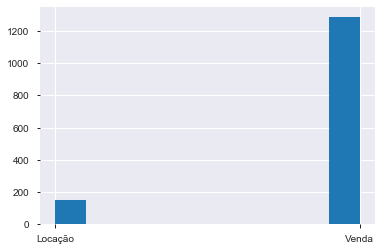

In [52]:
data.loc[((data.condominio <= 1) & (data.condominio != 0.00)) | (data.condominio >= 3000000)].tipo_negocio.hist();

In [317]:
data[data.condominio.isna()]

Empty DataFrame
Columns: [error, longitude, url, condominio, default, area_util, area_total, contato_imobiliaria, valor, isportal, isparticular, nome_corretor, banheiro, tipo_negocio, quarto, title, opcionais, latitude, descricao, lista_fotos, garagem, iptu, data_inclusao, codigo, finalidade, geohash, tipo_imovel, endereco, geometry.coordinates, scraping.spider_name, scraping.padrao, bairro.id, zoneamento.id, anunciante.id, area_construida, suite, area_terreno, area_privativa, cep, numero_corretor, area_comum, nome_contato, numero_contato_imagem]
Index: []

[0 rows x 43 columns]

In [316]:
data['condominio'].fillna(value=0, inplace=True)

##### cidade_uf Column

In [28]:
print(data.cidade_uf.value_counts())
data.drop(columns=['cidade_uf'], inplace=True)

curitiba_pr    149968
Name: cidade_uf, dtype: int64


##### default Column

In [55]:
data.default = data['default'].map({"['finalidade']": 1, '[]':0})
data.default

0         1
1         1
2         1
3         1
4         1
         ..
149963    1
149964    1
149965    0
149966    1
149967    1
Name: default, Length: 149968, dtype: int64

In [56]:
data.default.value_counts()

1    117571
0     32397
Name: default, dtype: int64

##### area_util Column

In [64]:
data[data.area_util.isna()]

error  longitude                                                url  \
2           0 -49.349094  http://www.redebee.com.br/imovel/casa-residenc...   
3           0 -49.350033  http://www.redebee.com.br/imovel/casa-residenc...   
5           0 -49.355035  http://www.redebee.com.br/imovel/excepcional-c...   
6           0 -49.241561  http://habitec.com.br/comprar-imovel/48446/ven...   
7           0 -49.296065  http://www.redebee.com.br/imovel/casa-residenc...   
...       ...        ...                                                ...   
149631      0 -49.339878  https://www.vivareal.com.br/imovel/lote-terren...   
149662      0 -49.318493  https://www.vivareal.com.br/imovel/lote-terren...   
149682      1 -49.295486  https://www.vivareal.com.br/imovel/lote-terren...   
149866      0 -49.261191  https://www.vivareal.com.br/imovel/apartamento...   
149912      0 -49.279252  https://www.vivareal.com.br/imovel/lote-terren...   

        condominio  default  area_util  area_total contato_imobiliaria  \
2            400.0        1        NaN         NaN     (41) 99165-0629   
3            620.0        1        NaN         NaN     (41) 99165-0629   
5              NaN        1        NaN         NaN     (41) 99165-0629   
6              NaN        1        NaN       206.0                 NaN   
7              NaN        1        NaN         NaN     (41) 99165-0629   
...            ...      ...        ...         ...                 ...   
149631         0.0        1        NaN       348.0                 NaN   
149662         0.0        1        NaN       120.0                 NaN   
149682         0.0        1        NaN       334.0                 NaN   
149866         0.0        1        NaN         NaN                 NaN   
149912         0.0        0        NaN       264.0                 NaN   

            valor  isportal  ...  area_comum seguro_incendio  email_corretor  \
2        714200.0     False  ...         NaN             NaN             NaN   
3       1577800.0     False  ...         NaN             NaN             NaN   
5       1200000.0     False  ...         NaN             NaN             NaN   
6        870000.0     False  ...         NaN             NaN             NaN   
7          1800.0     False  ...         NaN             NaN             NaN   
...           ...       ...  ...         ...             ...             ...   
149631   300000.0      True  ...         NaN             NaN             NaN   
149662   304000.0      True  ...         NaN             NaN             NaN   
149682   300231.0      True  ...         NaN             NaN             NaN   
149866   300000.0      True  ...         NaN             NaN             NaN   
149912   299000.0      True  ...         NaN             NaN             NaN   

       nome_contato  numero_contato_imagem  complemento terreno_fundo  \
2               NaN                    NaN          NaN           NaN   
3               NaN                    NaN          NaN           NaN   
5               NaN                    NaN          NaN           NaN   
6               NaN                    NaN          NaN           NaN   
7               NaN                    NaN          NaN           NaN   
...             ...                    ...          ...           ...   
149631          NaN                    NaN          NaN           NaN   
149662          NaN                    NaN          NaN           NaN   
149682          NaN                    NaN          NaN           NaN   
149866          NaN                    NaN          NaN           NaN   
149912          NaN                    NaN          NaN           NaN   

       terreno_frente  terreno_esquerda testada  
2                 NaN               NaN     NaN  
3                 NaN               NaN     NaN  
5                 NaN               NaN     NaN  
6                 NaN               NaN     NaN  
7                 NaN               NaN     NaN  
...               ...           

In [318]:
data['area_util'].fillna(value=0, inplace=True)

##### area_total Column

In [319]:
data[data.area_total.isna()]

error  longitude     url  condominio  default  area_util  area_total  \
2           0 -49.349094   28173       400.0        1        0.0         NaN   
3           0 -49.350033   28229       620.0        1        0.0         NaN   
5           0 -49.355035   28592         0.0        1        0.0         NaN   
7           0 -49.296065   28283         0.0        1        0.0         NaN   
9           1 -49.296844   28727        80.0        1       35.0         NaN   
...       ...        ...     ...         ...      ...        ...         ...   
149946      0 -49.268874  145660         0.0        0       41.0         NaN   
149949      0 -49.268409   77491         0.0        0       44.0         NaN   
149956      0 -49.294480   83331       400.0        1       53.0         NaN   
149963      0 -49.275410   67932       630.0        1       33.0         NaN   
149964      0 -49.275410   67928       640.0        1       33.0         NaN   

       contato_imobiliaria      valor  isportal  ...  anunciante.id  \
2          (41) 99165-0629   714200.0         0  ...            433   
3          (41) 99165-0629  1577800.0         0  ...            433   
5          (41) 99165-0629  1200000.0         0  ...            433   
7          (41) 99165-0629     1800.0         0  ...            433   
9          (41) 99165-0629      800.0         0  ...            433   
...                    ...        ...       ...  ...            ...   
149946                 NaN   302000.0         1  ...            524   
149949                 NaN   300786.0         1  ...            524   
149956                 NaN   304000.0         1  ...           1187   
149963                 NaN     2490.0         1  ...            706   
149964                 NaN     2450.0         1  ...            706   

       area_construida  suite  area_terreno  area_privativa  cep  \
2                126.0    1.0         121.0             NaN  NaN   
3                244.0    2.0         526.0             NaN  NaN   
5                255.0    1.0         450.0             NaN  NaN   
7                153.0    1.0         282.0             NaN  NaN   
9                  NaN    0.0           NaN             NaN  NaN   
...                ...    ...           ...             ...  ...   
149946             NaN    0.0           NaN             NaN  NaN   
149949             NaN    0.0           NaN             NaN  NaN   
149956             NaN    1.0           NaN             NaN  NaN   
149963             NaN    0.0           NaN             NaN  NaN   
149964             NaN    0.0           NaN             NaN  NaN   

       numero_corretor  area_comum nome_contato numero_contato_imagem  
2                  NaN         NaN          NaN                   NaN  
3                  NaN         NaN          NaN                   NaN  
5                  NaN         NaN          NaN                   NaN  
7                  NaN         NaN          NaN                   NaN  
9                  NaN         NaN          NaN                   NaN  
...                ...         ...          ...                   ...  
149946             NaN         NaN          NaN                   NaN  
149949             NaN         NaN          NaN                   NaN  
149956             NaN         NaN          NaN                   NaN  
149963             NaN         NaN          NaN                   NaN  
149964             NaN         NaN          NaN                   NaN  

[43776 rows x 43 columns]

In [320]:
data['area_total'].fillna(value=0, inplace=True)

##### contato_imobiliaria Column

In [322]:
data.drop(columns=['contato_imobiliaria'], inplace=True)

##### valor Column

In [323]:
data[data.valor.isna()]

error  longitude    url  condominio  default  area_util  area_total  \
1082       0 -49.214931  27056      308.32        1       43.0        49.0   
2674       0 -49.220266  32246      300.00        1       51.0         0.0   
2844       0 -49.276839  32169      300.00        1       47.0        95.0   
3530       0 -49.297156  31983     1000.00        1      497.0       756.0   
3634       0 -49.297156  32619     1000.00        1      367.0       612.0   
...      ...        ...    ...         ...      ...        ...         ...   
53246      0        NaN  33086      370.00        1       45.0         0.0   
54442      0        NaN  46868        0.00        1        0.0         0.0   
63647      0        NaN  49710        0.00        1        0.0         0.0   
64230      0        NaN  49804        0.00        1       72.0         0.0   
65192      0        NaN  48632        0.00        1        0.0         0.0   

       valor  isportal  isparticular  ... anunciante.id  area_construida  \
1082     NaN         0             0  ...           433              NaN   
2674     NaN         0             0  ...           825              NaN   
2844     NaN         0             0  ...           825              NaN   
3530     NaN         0             0  ...           825              NaN   
3634     NaN         0             0  ...           825              NaN   
...      ...       ...           ...  ...           ...              ...   
53246    NaN         1             1  ...           484              NaN   
54442    NaN         1             1  ...           484              NaN   
63647    NaN         1             1  ...           484              NaN   
64230    NaN         1             1  ...           484              NaN   
65192    NaN         1             1  ...           484              NaN   

       suite  area_terreno area_privativa        cep  numero_corretor  \
1082     0.0           NaN            6.0        NaN              NaN   
2674     0.0           NaN           51.0        NaN              NaN   
2844     0.0           NaN           74.0        NaN              NaN   
3530     4.0           NaN          497.0        NaN              NaN   
3634     4.0           NaN          367.0        NaN              NaN   
...      ...           ...            ...        ...              ...   
53246    0.0           NaN            NaN  80420-120              NaN   
54442    0.0           NaN            NaN  81830-020              NaN   
63647    0.0           NaN            NaN  81490-584              NaN   
64230    0.0           NaN            NaN  81200-100              NaN   
65192    0.0           NaN            NaN  81470-267              NaN   

      area_comum      nome_contato  \
1082         NaN               NaN   
2674         NaN               NaN   
2844         NaN               NaN   
3530         NaN               NaN   
3634         NaN               NaN   
...          ...               ...   
53246       45.0      jbccorreia64   
54442        NaN             Maria   
63647        NaN    Debora Rayhena   
64230       72.0  Leonardo Quadros   
65192        NaN                ma   

                                   numero_contato_imagem  
1082                                                 NaN  
2674                                                 NaN  
2844                                                 NaN  
3530                                                 NaN  
3634                                                 NaN  
...                                                  ...  
53246  https://static.bn-static.com/pg/0bEori01wBhKx+...  
54442  https://static.bn-static.com/pg/0xToatvsjUYo5A...  
63647  https://static.bn-static.com/pg/03Om73LfBbvN21...  
64230  https://static.bn-static.com/pg/0nofCREGRd5psQ...  
65192  https://static.bn-static.com/pg/0cSRITzw8czjNK...  

[1462 rows x 42 columns]

In [338]:
data['valor'].fillna(value=0, inplace=True)

##### isportal Column

In [175]:
data.isportal.value_counts()

True     104948
False     45020
Name: isportal, dtype: int64

In [187]:
data['isportal'] = data['isportal'].map({True: 1, False: 0})

In [188]:
data.isportal.value_counts()

1    104948
0     45020
Name: isportal, dtype: int64

##### isparticular Column

In [204]:
data.isparticular.value_counts()

False    135390
True      14578
Name: isparticular, dtype: int64

In [205]:
data['isparticular'] = data['isparticular'].map({True: 1, False: 0})

In [206]:
data.isparticular.value_counts()

0    135390
1     14578
Name: isparticular, dtype: int64

##### nome_corretor Column

In [210]:
data.nome_corretor.value_counts()

Eliana                      315
Fernando Gomes              315
Imobiliária Time            257
José Luiz Bambulim          243
Vitória Imóveis Curitiba    237
                           ... 
Marcia Elizabeti Favato       1
Wesley Bueno                  1
Guilhermando                  1
Marcelo Bufrem                1
Luiz Furquim                  1
Name: nome_corretor, Length: 226, dtype: int64

In [213]:
data[~data.nome_corretor.isna()]

error  longitude                                                url  \
0          0 -49.278522  http://www.redebee.com.br/imovel/apartamento-r...   
1          0 -49.280365  http://www.redebee.com.br/imovel/studio-reside...   
2          0 -49.349094  http://www.redebee.com.br/imovel/casa-residenc...   
3          0 -49.350033  http://www.redebee.com.br/imovel/casa-residenc...   
4          0 -49.236857  http://www.redebee.com.br/imovel/loja-comercia...   
...      ...        ...                                                ...   
52271      1 -49.272186  http://www.especialeimoveis.com.br/imovel/terr...   
52292      0 -49.207676  http://www.especialeimoveis.com.br/imovel/apar...   
52367      0 -49.291336  http://www.especialeimoveis.com.br/imovel/apar...   
52388      0 -49.285362  http://www.especialeimoveis.com.br/imovel/apar...   
52454      0 -49.280163  http://www.especialeimoveis.com.br/imovel/apar...   

       condominio  default  area_util  area_total contato_imobiliaria  \
0           590.0        1      131.0      131.00     (41) 99165-0629   
1           356.0        1       36.0       69.00     (41) 99165-0629   
2           400.0        1        NaN         NaN     (41) 99165-0629   
3           620.0        1        NaN         NaN     (41) 99165-0629   
4             NaN        1       23.0       23.00     (41) 99165-0629   
...           ...      ...        ...         ...                 ...   
52271      1350.0        0        NaN     1876.50                 NaN   
52292       200.0        1       36.4       41.35                 NaN   
52367       510.0        0      104.0      140.00                 NaN   
52388      1600.0        0       87.0      173.00                 NaN   
52454       600.0        0       80.0      124.00                 NaN   

           valor  isportal  ...                      anunciante.nome  \
0         1590.0         0  ...                             Rede Bee   
1         1200.0         0  ...                             Rede Bee   
2       714200.0         0  ...                             Rede Bee   
3      1577800.0         0  ...                             Rede Bee   
4          650.0         0  ...                             Rede Bee   
...          ...       ...  ...                                  ...   
52271  2600000.0         0  ...  Especiale Imóveis Especiale Imóveis   
52292   115000.0         0  ...  Especiale Imóveis Especiale Imóveis   
52367   520000.0         0  ...  Especiale Imóveis Especiale Imóveis   
52388   790000.0         0  ...  Especiale Imóveis Especiale Imóveis   
52454   305000.0         0  ...  Especiale Imóveis Especiale Imóveis   

      area_construida  suite  area_terreno  area_privativa  cep  \
0                 NaN    0.0           NaN             NaN  NaN   
1                 NaN    0.0           NaN             NaN  NaN   
2               126.0    1.0         121.0             NaN  NaN   
3               244.0    2.0         526.0             NaN  NaN   
4                 NaN    0.0           NaN             NaN  NaN   
...               ...    ...           ...             ...  ...   
52271             NaN    0.0           NaN             NaN  NaN   
52292             NaN    0.0           NaN            36.4  NaN   
52367             NaN    1.0           NaN           104.0  NaN   
52388             NaN    1.0           NaN             NaN  NaN   
52454             NaN    1.0           NaN            80.0  NaN   

       numero_corretor  area_comum nome_contato numero_contato_imagem  
0                  NaN         NaN          NaN                   NaN  
1                  NaN         NaN          NaN                   NaN  
2                  NaN         NaN          NaN                   NaN  
3                  NaN         NaN          NaN                   NaN  
4                  NaN         NaN          NaN                   NaN  
...                ...         ...          ...                   ...  
52271  (41) 99720-0

In [339]:
data.drop(columns=['nome_corretor'], inplace=True)

##### banheiro Column

In [341]:
data[data.banheiro.isna()]

error  longitude     url  condominio  default  area_util  area_total  \
9           1 -49.296844   28727        80.0        1      35.00        0.00   
11          0 -49.288635    9610         0.0        1      50.00       50.00   
13          0 -49.249092   11997         0.0        1     201.60      201.60   
27          0 -49.280849   11116       800.0        1     128.21      225.37   
30          0 -49.286560   13159         0.0        1       0.00      304.00   
...       ...        ...     ...         ...      ...        ...         ...   
149560      1 -49.275480  135711       500.0        1     458.00      860.00   
149645      1 -49.299421  141536         0.0        1     387.00      387.00   
149662      0 -49.318493  137281         0.0        1       0.00      120.00   
149682      1 -49.295486  139156         0.0        1       0.00      334.00   
149912      0 -49.279252  141670         0.0        0       0.00      264.00   

           valor  isportal  isparticular  ...  anunciante.id  area_construida  \
9          800.0         0             0  ...            433              NaN   
11        1300.0         0             0  ...            523              NaN   
13      580000.0         0             0  ...            523              NaN   
27      590000.0         0             0  ...            523              NaN   
30      480000.0         0             0  ...            856              NaN   
...          ...       ...           ...  ...            ...              ...   
149560  298000.0         1             0  ...            359              NaN   
149645  300000.0         1             0  ...            418              NaN   
149662  304000.0         1             0  ...           1571              NaN   
149682  300231.0         1             0  ...           1077              NaN   
149912  299000.0         1             0  ...           1037              NaN   

        suite area_terreno area_privativa  cep numero_corretor area_comum  \
9         0.0          NaN            NaN  NaN             NaN        NaN   
11        0.0          NaN            NaN  NaN             NaN        NaN   
13        0.0          NaN            NaN  NaN             NaN        NaN   
27        0.0          NaN            NaN  NaN             NaN        NaN   
30        0.0        304.0            NaN  NaN             NaN        NaN   
...       ...          ...            ...  ...             ...        ...   
149560    0.0          NaN            NaN  NaN             NaN        NaN   
149645    0.0          NaN            NaN  NaN             NaN        NaN   
149662    0.0          NaN            NaN  NaN             NaN        NaN   
149682    0.0          NaN            NaN  NaN             NaN        NaN   
149912    0.0          NaN            NaN  NaN             NaN        NaN   

        nome_contato  numero_contato_imagem  
9                NaN                    NaN  
11               NaN                    NaN  
13               NaN                    NaN  
27               NaN                    NaN  
30               NaN                    NaN  
...              ...                    ...  
149560           NaN                    NaN  
149645           NaN                    NaN  
149662           NaN                    NaN  
149682           NaN                    NaN  
149912           NaN                    NaN  

[38243 rows x 41 columns]

In [354]:
data.banheiro.describe()

count    149968.000000
mean          1.543909
std           1.610748
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          50.000000
Name: banheiro, dtype: float64

In [342]:
data['banheiro'].fillna(value=1, inplace=True)

##### tipo_negocio Column

In [207]:
data.tipo_negocio.value_counts()

Venda      123582
Locação     26386
Name: tipo_negocio, dtype: int64

In [208]:
data['tipo_negocio'] = data['tipo_negocio'].map({'Venda': 0, 'Locação': 1})

In [209]:
data.tipo_negocio.value_counts()

0    123582
1     26386
Name: tipo_negocio, dtype: int64

##### quarto Column

In [343]:
data.quarto

0         2.0
1         1.0
2         3.0
3         4.0
4         NaN
         ... 
149963    1.0
149964    1.0
149965    3.0
149966    3.0
149967    3.0
Name: quarto, Length: 149968, dtype: float64

In [344]:
data[data.quarto.isna()]

error  longitude     url  condominio  default  area_util  area_total  \
4           0 -49.236857   28687         0.0        1       23.0        23.0   
9           1 -49.296844   28727        80.0        1       35.0         0.0   
11          0 -49.288635    9610         0.0        1       50.0        50.0   
15          0 -49.241856   28059         0.0        1        0.0         0.0   
30          0 -49.286560   13159         0.0        1        0.0       304.0   
...       ...        ...     ...         ...      ...        ...         ...   
149560      1 -49.275480  135711       500.0        1      458.0       860.0   
149645      1 -49.299421  141536         0.0        1      387.0       387.0   
149662      0 -49.318493  137281         0.0        1        0.0       120.0   
149682      1 -49.295486  139156         0.0        1        0.0       334.0   
149912      0 -49.279252  141670         0.0        0        0.0       264.0   

            valor  isportal  isparticular  ...  anunciante.id  \
4           650.0         0             0  ...            433   
9           800.0         0             0  ...            433   
11         1300.0         0             0  ...            523   
15      2000000.0         0             0  ...            433   
30       480000.0         0             0  ...            856   
...           ...       ...           ...  ...            ...   
149560   298000.0         1             0  ...            359   
149645   300000.0         1             0  ...            418   
149662   304000.0         1             0  ...           1571   
149682   300231.0         1             0  ...           1077   
149912   299000.0         1             0  ...           1037   

        area_construida  suite area_terreno area_privativa  cep  \
4                   NaN    0.0          NaN            NaN  NaN   
9                   NaN    0.0          NaN            NaN  NaN   
11                  NaN    0.0          NaN            NaN  NaN   
15                350.0    0.0        731.0            NaN  NaN   
30                  NaN    0.0        304.0            NaN  NaN   
...                 ...    ...          ...            ...  ...   
149560              NaN    0.0          NaN            NaN  NaN   
149645              NaN    0.0          NaN            NaN  NaN   
149662              NaN    0.0          NaN            NaN  NaN   
149682              NaN    0.0          NaN            NaN  NaN   
149912              NaN    0.0          NaN            NaN  NaN   

       numero_corretor area_comum  nome_contato  numero_contato_imagem  
4                  NaN        NaN           NaN                    NaN  
9                  NaN        NaN           NaN                    NaN  
11                 NaN        NaN           NaN                    NaN  
15                 NaN        NaN           NaN                    NaN  
30                 NaN        NaN           NaN                    NaN  
...                ...        ...           ...                    ...  
149560             NaN        NaN           NaN                    NaN  
149645             NaN        NaN           NaN                    NaN  
149662             NaN        NaN           NaN                    NaN  
149682             NaN        NaN           NaN                    NaN  
149912             NaN        NaN           NaN                    NaN  

[13090 rows x 41 columns]

In [347]:
data.quarto.describe()

count    136878.000000
mean          2.404009
std           1.313269
min           0.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          80.000000
Name: quarto, dtype: float64

In [348]:
data['quarto'].fillna(value=1, inplace=True)

##### status Column

In [202]:
data.status.value_counts()

1    149968
Name: status, dtype: int64

In [203]:
data.drop(columns=['status'], inplace=True)

##### title Column

In [366]:
data[data.title.isna()]

error    url  condominio  default  area_util  area_total      valor  \
8114       0  21236         0.0        1        0.0      100.00   80000.00   
8115       0  21214         0.0        1        0.0       35.00       0.00   
8119       0  21232         0.0        1        0.0      143.00  290000.00   
8120       0  21220         0.0        1        0.0       68.00  215000.00   
8121       0  21215         0.0        1        0.0       52.70  279400.00   
...      ...    ...         ...      ...        ...         ...        ...   
48230      1  13516         0.0        1        0.0      755.92  525046.50   
48231      0  13499         0.0        1        0.0      527.13    7000.00   
48610      1  13512         0.0        1        0.0     1480.37  919175.75   
48620      0  13505         0.0        1        0.0     1000.82  690500.00   
48623      1  13513         0.0        1        0.0     1186.27  769029.80   

       isportal  isparticular  banheiro  ...  anunciante.id  area_construida  \
8114          0             0       0.0  ...            628              NaN   
8115          0             0       0.0  ...            628              NaN   
8119          0             0       0.0  ...            628              NaN   
8120          0             0       0.0  ...            628              NaN   
8121          0             0       0.0  ...            628              NaN   
...         ...           ...       ...  ...            ...              ...   
48230         0             0       0.0  ...           1137              NaN   
48231         0             0       0.0  ...           1137              NaN   
48610         0             0       0.0  ...           1137              NaN   
48620         0             0       0.0  ...           1137              NaN   
48623         0             0       0.0  ...           1137              NaN   

      suite area_terreno  area_privativa  cep numero_corretor  area_comum  \
8114    0.0          NaN          100.00  NaN             NaN         NaN   
8115    0.0          NaN           28.00  NaN             NaN         NaN   
8119    0.0          NaN          143.00  NaN             NaN         NaN   
8120    0.0          NaN           50.00  NaN             NaN         NaN   
8121    0.0          NaN           39.26  NaN             NaN         NaN   
...     ...          ...             ...  ...             ...         ...   
48230   0.0          0.0          318.21  NaN             NaN         0.0   
48231   0.0          0.0          527.13  NaN             NaN         0.0   
48610   0.0          0.0          623.17  NaN             NaN         0.0   
48620   0.0          0.0          785.06  NaN             NaN         0.0   
48623   0.0          0.0          499.37  NaN             NaN         0.0   

       nome_contato numero_contato_imagem  
8114            NaN                   NaN  
8115            NaN                   NaN  
8119            NaN                   NaN  
8120            NaN                   NaN  
8121            NaN                   NaN  
...             ...                   ...  
48230           NaN                   NaN  
48231           NaN                   NaN  
48610           NaN                   NaN  
48620           NaN                   NaN  
48623           NaN                   NaN  

[110 rows x 39 columns]

In [367]:
data['title'].fillna(value="a", inplace=True)

In [368]:
lb_make = LabelEncoder()
data['title'] = lb_make.fit_transform(data['title'])
data['title'].head()

0    26192
1    85006
2    52214
3    52751
4    70387
Name: title, dtype: int32

In [369]:
data['title'].value_counts()

59048    5113
66211    2931
90694    2921
41998    1809
90701    1599
         ... 
1107        1
15444       1
13397       1
11350       1
0           1
Name: title, Length: 92247, dtype: int64

##### opcionais Column

In [372]:
data[data.opcionais.isna()]

Empty DataFrame
Columns: [error, url, condominio, default, area_util, area_total, valor, isportal, isparticular, banheiro, tipo_negocio, quarto, title, opcionais, latitude, descricao, lista_fotos, garagem, iptu, data_inclusao, codigo, finalidade, geohash, tipo_imovel, endereco, geometry.coordinates, scraping.spider_name, bairro.id, zoneamento.id, anunciante.id, area_construida, suite, area_terreno, area_privativa, cep, numero_corretor, area_comum, nome_contato, numero_contato_imagem]
Index: []

[0 rows x 39 columns]

In [373]:
lb_make = LabelEncoder()
data['opcionais'] = lb_make.fit_transform(data['opcionais'])
data['opcionais'].head()

0    70746
1    65493
2    70233
3    63677
4        0
Name: opcionais, dtype: int32

In [374]:
data['opcionais'].value_counts()

0        12885
54851     2539
76976      873
15456      445
9346       406
         ...  
81770        1
69484        1
67437        1
73582        1
84117        1
Name: opcionais, Length: 89992, dtype: int64

##### latitude Column

In [375]:
data.drop(columns=['latitude'], inplace=True)

##### descricao Column

In [380]:
data[data['descricao'].isna()]

Empty DataFrame
Columns: [error, url, condominio, default, area_util, area_total, valor, isportal, isparticular, banheiro, tipo_negocio, quarto, title, opcionais, descricao, lista_fotos, garagem, iptu, data_inclusao, codigo, finalidade, geohash, tipo_imovel, endereco, geometry.coordinates, scraping.spider_name, bairro.id, zoneamento.id, anunciante.id, area_construida, suite, area_terreno, area_privativa, cep, numero_corretor, area_comum, nome_contato, numero_contato_imagem]
Index: []

[0 rows x 38 columns]

In [381]:
lb_make = LabelEncoder()
data['descricao'] = lb_make.fit_transform(data['descricao'])
data['descricao'].head()

0    99276
1    99289
2    60811
3    49907
4    88973
Name: descricao, dtype: int32

##### lista_fotos Column

In [384]:
data[data.lista_fotos.isna()]

error    url  condominio  default  area_util  area_total      valor  \
645        0  55348         0.0        1        0.0        0.00   749000.0   
839        0   8017         0.0        1        0.0        0.00      900.0   
844        0  10493         0.0        1        0.0        0.00     5000.0   
863        0   7952         0.0        1        0.0        0.00     1150.0   
878        0  11576         0.0        1      290.0      421.42  1550000.0   
...      ...    ...         ...      ...        ...         ...        ...   
65619      0  35023       150.0        0       46.0        0.00   170000.0   
65670      0  52354       200.0        1       47.0        0.00   135000.0   
65671      0  34976         0.0        1       54.0        0.00   110000.0   
65704      0  51857        90.0        0       55.0        0.00   140000.0   
65712      0  34489         0.0        1        0.0        0.00   150000.0   

       isportal  isparticular  banheiro  ...  anunciante.id  area_construida  \
645           0             0       2.0  ...           1013            220.0   
839           0             0       0.0  ...            523              NaN   
844           0             0       0.0  ...            523              NaN   
863           0             0       0.0  ...            523              NaN   
878           0             0       0.0  ...            523              NaN   
...         ...           ...       ...  ...            ...              ...   
65619         1             1       0.0  ...            484              NaN   
65670         1             1       0.0  ...            484              NaN   
65671         1             1       0.0  ...            484              NaN   
65704         1             1       0.0  ...            484              NaN   
65712         1             1       0.0  ...            484              NaN   

       suite  area_terreno  area_privativa        cep  numero_corretor  \
645      0.0         385.0             NaN        NaN              NaN   
839      0.0           NaN             NaN        NaN              NaN   
844      0.0           NaN             NaN        NaN              NaN   
863      0.0           NaN             NaN        NaN              NaN   
878      0.0           NaN             NaN        NaN              NaN   
...      ...           ...             ...        ...              ...   
65619    0.0           NaN             NaN  81270-130              NaN   
65670    0.0           NaN             NaN  81925-060              NaN   
65671    0.0           NaN             NaN  81050-617              NaN   
65704    0.0           NaN             NaN  81250-490              NaN   
65712    0.0           NaN             NaN  80001-972              NaN   

       area_comum               nome_contato  \
645           NaN                        NaN   
839           NaN                        NaN   
844           NaN                        NaN   
863           NaN                        NaN   
878           NaN                        NaN   
...           ...                        ...   
65619        46.0                       Rose   
65670        47.0             FÃƒÂ¡bio Alves   
65671        54.0                     Cleber   
65704        55.0  valentinabarbosadealencar   
65712         NaN                 xlefi54967   

                                   numero_contato_imagem  
645                                                  NaN  
839                                                  NaN  
844                                                  NaN  
863                                                  NaN  
878                                                  NaN  
...                                                  ...  
65619  https://static.bn-static.com/pg/0z8jOvSvAQaQzH...  
65670  https://static.bn-static.com/pg/067anNFMUZpBSz...  
65671  https://static.bn-static.com/pg/0o9EXA4JiwTSmO...  
65704  https://static.bn-static.com/pg/0vRWDH0V6pqFZu

In [385]:
data['lista_fotos'].fillna(value="a", inplace=True)

In [386]:
lb_make = LabelEncoder()
data['lista_fotos'] = lb_make.fit_transform(data['lista_fotos'])
data['lista_fotos'].head()

0    43717
1    48424
2    46358
3    46547
4    52894
Name: lista_fotos, dtype: int32

##### garagem Column

In [376]:
data[data.garagem.isna()].garagem.value_counts()

Series([], Name: garagem, dtype: int64)

In [164]:
data[data.garagem.isna()].garagem

4        NaN
9        NaN
11       NaN
29       NaN
30       NaN
          ..
149912   NaN
149925   NaN
149926   NaN
149963   NaN
149964   NaN
Name: garagem, Length: 21169, dtype: float64

In [377]:
data.garagem.describe()

count    149968.000000
mean          1.611550
std           3.176019
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max         600.000000
Name: garagem, dtype: float64

In [165]:
data['garagem'].fillna(value=1, inplace=True)

In [166]:
data.garagem.value_counts()

Series([], Name: garagem, dtype: float64)

##### iptu Column

In [169]:
data.iptu.value_counts()

0.00       61998
1.00        1081
400.00       511
500.00       503
50.00        479
           ...  
90.51          1
4849.00        1
2789.00        1
7623.00        1
43.09          1
Name: iptu, Length: 3396, dtype: int64

In [174]:
data[data.iptu.isna()]

error  longitude                                                url  \
2           0 -49.349094  http://www.redebee.com.br/imovel/casa-residenc...   
3           0 -49.350033  http://www.redebee.com.br/imovel/casa-residenc...   
5           0 -49.355035  http://www.redebee.com.br/imovel/excepcional-c...   
6           0 -49.241561  http://habitec.com.br/comprar-imovel/48446/ven...   
10          0 -49.350033  http://www.redebee.com.br/imovel/casa-residenc...   
...       ...        ...                                                ...   
149259      0 -49.268550  https://www.vivareal.com.br/imovel/sala-comerc...   
149453      0 -49.251576  https://www.vivareal.com.br/imovel/apartamento...   
149528      1 -49.247687  https://www.vivareal.com.br/imovel/casa-3-quar...   
149729      0 -49.257764  https://www.vivareal.com.br/imovel/apartamento...   
149867      0 -49.318803  https://www.vivareal.com.br/imovel/lote-terren...   

        condominio  default  area_util  area_total contato_imobiliaria  \
2            400.0        1        NaN         NaN     (41) 99165-0629   
3            620.0        1        NaN         NaN     (41) 99165-0629   
5              NaN        1        NaN         NaN     (41) 99165-0629   
6              NaN        1        NaN       206.0                 NaN   
10           650.0        1        NaN         NaN     (41) 99165-0629   
...            ...      ...        ...         ...                 ...   
149259       380.0        0       34.0        60.0                 NaN   
149453         NaN        1       55.0        90.0                 NaN   
149528         NaN        1      100.0       180.0                 NaN   
149729       250.0        1       90.0       130.0                 NaN   
149867         NaN        1      185.0       299.0                 NaN   

            valor  isportal  ...                           anunciante.nome  \
2        714200.0     False  ...                                  Rede Bee   
3       1577800.0     False  ...                                  Rede Bee   
5       1200000.0     False  ...                                  Rede Bee   
6        870000.0     False  ...                           Habitec Imoveis   
10      1839500.0     False  ...                                  Rede Bee   
...           ...       ...  ...                                       ...   
149259   290000.0      True  ...        Uniko Imóveis Ltda - ME - VivaReal   
149453   295150.0      True  ...              WANDERLEY JUNGLES - VivaReal   
149528   298000.0      True  ...  Imobiliária Nova Geração Ltda - VivaReal   
149729   299000.0      True  ...        Marcos Marcelo Malanski - VivaReal   
149867   299000.0      True  ...         ALEXSSEI MARTINS CUNHA - VivaReal   

       area_construida  suite area_terreno  area_privativa         cep  \
2                126.0    1.0        121.0             NaN         NaN   
3                244.0    2.0        526.0             NaN         NaN   
5                255.0    1.0        450.0             NaN         NaN   
6                  NaN    1.0          NaN           191.8  82.530-000   
10               267.0    4.0        588.0             NaN         NaN   
...                ...    ...          ...             ...         ...   
149259             NaN    0.0          NaN             NaN         NaN   
149453             NaN    1.0          NaN             NaN         NaN   
149528             NaN    2.0          NaN             NaN         NaN   
149729             NaN    1.0          NaN             NaN         NaN   
149867             NaN    0.0          NaN             NaN         NaN   

        numero_corretor area_comum  nome_contato numero_contato_imagem  
2                   NaN        NaN           NaN                   NaN  
3                   NaN        NaN           NaN                   NaN  
5                   NaN        NaN           NaN                   NaN  
6        (41) 3340-3222        NaN           NaN    

In [378]:
data['iptu'].fillna(value=0, inplace=True)

##### data_inclusao Column

In [69]:
data['data_inclusao'] = pd.to_datetime(data['data_inclusao'])

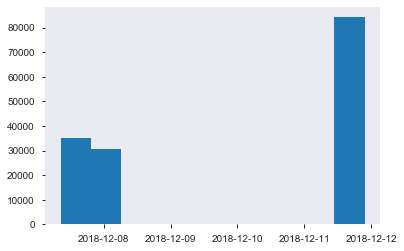

In [74]:
data['data_inclusao'].hist(grid=False);

In [105]:
data.loc[1, 'data_inclusao'].date()

datetime.date(2018, 12, 7)

In [219]:
mask = (data['data_inclusao'] >= datetime.date(2018, 12, 7)) & (data['data_inclusao'] < datetime.date(2018, 12, 8))

In [221]:
first = data[mask]

In [222]:
mask = (data['data_inclusao'] >= datetime.date(2018, 12, 8)) & (data['data_inclusao'] <= datetime.date(2018, 12, 10))

In [223]:
second = data[mask]

In [224]:
mask = (data['data_inclusao'] >= datetime.date(2018, 12, 11)) & (data['data_inclusao'] <= datetime.date(2018, 12, 12))

In [225]:
third = data[mask]

In [229]:
len(first) + len(second) + len(third)

149968

In [239]:
first.reset_index(inplace=True, drop=True)
second.reset_index(inplace=True, drop=True)
third.reset_index(inplace=True, drop=True)

##### codigo Column

In [106]:
data.codigo.value_counts()

02894.001      6
ANG 621        6
06433.001      5
181119         5
00192.001      4
              ..
557795323.0    1
AP00139        1
558187325      1
179097         1
555953884      1
Name: codigo, Length: 54329, dtype: int64

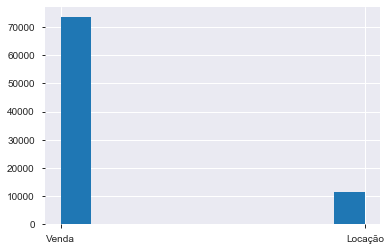

In [111]:
data[data.codigo.isna()].tipo_negocio.hist()

In [387]:
data.drop(columns=['codigo'], inplace=True)

##### finalidade Column 

In [113]:
data.finalidade.value_counts()

['Residencial']                 95685
[]                              37653
['Comercial']                   13387
['Industrial']                   2745
['Comercial', 'Residencial']      206
['Residencial', 'Comercial']      119
['Rural']                          71
['Comercial', 'Industrial']        52
['Industrial', 'Comercial']        45
['Turístico']                       5
Name: finalidade, dtype: int64

In [388]:
data[data.finalidade.isna()]

Empty DataFrame
Columns: [error, url, condominio, default, area_util, area_total, valor, isportal, isparticular, banheiro, tipo_negocio, quarto, title, opcionais, descricao, lista_fotos, garagem, iptu, data_inclusao, finalidade, geohash, tipo_imovel, endereco, geometry.coordinates, scraping.spider_name, bairro.id, zoneamento.id, anunciante.id, area_construida, suite, area_terreno, area_privativa, cep, numero_corretor, area_comum, nome_contato, numero_contato_imagem]
Index: []

[0 rows x 37 columns]

In [389]:
lb_make = LabelEncoder()
data['finalidade'] = lb_make.fit_transform(data['finalidade'])
data['finalidade'].head()

0    6
1    6
2    6
3    6
4    2
Name: finalidade, dtype: int32

In [390]:
data.finalidade.value_counts()

6    95685
9    37653
2    13387
4     2745
1      206
5      119
7       71
0       52
3       45
8        5
Name: finalidade, dtype: int64

##### geohash Column

In [392]:
data[data.geohash.isna()]

error     url  condominio  default  area_util  area_total     valor  \
6492        0   18058         0.0        1        0.0         0.0    1500.0   
6493        0   18055         0.0        1        0.0         0.0     750.0   
6495        0   18050         0.0        1        0.0         0.0     700.0   
7274        0   18048         0.0        1        0.0         0.0     500.0   
7275        0   18049         0.0        1        0.0         0.0     500.0   
...       ...     ...         ...      ...        ...         ...       ...   
149888      0   74557       365.0        0       89.0        89.0  300000.0   
149892      0  101535       330.0        0       67.0       106.0  298000.0   
149925      0   70758         0.0        0       48.0         0.0  299000.0   
149932      0   77609       450.0        1       60.0        71.0  299990.0   
149965      0  116612         0.0        0      226.0       450.0    2490.0   

        isportal  isparticular  banheiro  ...  anunciante.id  area_construida  \
6492           0             0       0.0  ...            912            130.0   
6493           0             0       0.0  ...            912             40.0   
6495           0             0       0.0  ...            912             40.0   
7274           0             0       0.0  ...            912             44.0   
7275           0             0       0.0  ...            912             40.0   
...          ...           ...       ...  ...            ...              ...   
149888         1             0       1.0  ...            965              NaN   
149892         1             0       2.0  ...             69              NaN   
149925         1             0       1.0  ...            452              NaN   
149932         1             0       1.0  ...           1302              NaN   
149965         1             0       3.0  ...           1182              NaN   

        suite  area_terreno  area_privativa  cep  numero_corretor  area_comum  \
6492      1.0           NaN             NaN  NaN              NaN         NaN   
6493      0.0           NaN             NaN  NaN              NaN         NaN   
6495      0.0           NaN             NaN  NaN              NaN         NaN   
7274      0.0           NaN             NaN  NaN              NaN         NaN   
7275      0.0           NaN             NaN  NaN              NaN         NaN   
...       ...           ...             ...  ...              ...         ...   
149888    0.0           NaN             NaN  NaN              NaN         NaN   
149892    1.0           NaN             NaN  NaN              NaN         NaN   
149925    0.0           NaN             NaN  NaN              NaN         NaN   
149932    0.0           NaN             NaN  NaN              NaN         NaN   
149965    1.0           NaN             NaN  NaN              NaN         NaN   

       nome_contato  numero_contato_imagem  
6492            NaN                    NaN  
6493            NaN                    NaN  
6495            NaN                    NaN  
7274            NaN                    NaN  
7275            NaN                    NaN  
...             ...                    ...  
149888          NaN                    NaN  
149892          NaN                    NaN  
149925          NaN                    NaN  
149932          NaN                    NaN  
149965          NaN                    NaN  

[30375 rows x 37 columns]

In [394]:
data['geohash'].fillna(value="a", inplace=True)

In [395]:
lb_make = LabelEncoder()
data['geohash'] = lb_make.fit_transform(data['geohash'])
data['geohash'].head()

0    19281
1    20327
2     7334
3    10018
4     5777
Name: geohash, dtype: int32

##### tipo_imovel Column

In [398]:
data[data.tipo_imovel.isna()]

Empty DataFrame
Columns: [error, url, condominio, default, area_util, area_total, valor, isportal, isparticular, banheiro, tipo_negocio, quarto, title, opcionais, descricao, lista_fotos, garagem, iptu, data_inclusao, finalidade, geohash, tipo_imovel, endereco, geometry.coordinates, scraping.spider_name, bairro.id, zoneamento.id, anunciante.id, area_construida, suite, area_terreno, area_privativa, cep, numero_corretor, area_comum, nome_contato, numero_contato_imagem]
Index: []

[0 rows x 37 columns]

In [399]:
lb_make = LabelEncoder()
data['tipo_imovel'] = lb_make.fit_transform(data['tipo_imovel'])
data['tipo_imovel'].head()

0     35
1    693
2     80
3     80
4    445
Name: tipo_imovel, dtype: int32

##### endereco Column

In [400]:
data[data.endereco.isna()]

error     url  condominio  default  area_util  area_total     valor  \
2086        0   53547         0.0        1        0.0         0.0  259900.0   
4893        0   30164       100.0        1        0.0         0.0  418000.0   
6492        0   18058         0.0        1        0.0         0.0    1500.0   
6493        0   18055         0.0        1        0.0         0.0     750.0   
6495        0   18050         0.0        1        0.0         0.0     700.0   
...       ...     ...         ...      ...        ...         ...       ...   
149888      0   74557       365.0        0       89.0        89.0  300000.0   
149892      0  101535       330.0        0       67.0       106.0  298000.0   
149925      0   70758         0.0        0       48.0         0.0  299000.0   
149932      0   77609       450.0        1       60.0        71.0  299990.0   
149965      0  116612         0.0        0      226.0       450.0    2490.0   

        isportal  isparticular  banheiro  ...  anunciante.id  area_construida  \
2086           0             0       2.0  ...           1278             80.0   
4893           0             0       2.0  ...           1129              NaN   
6492           0             0       0.0  ...            912            130.0   
6493           0             0       0.0  ...            912             40.0   
6495           0             0       0.0  ...            912             40.0   
...          ...           ...       ...  ...            ...              ...   
149888         1             0       1.0  ...            965              NaN   
149892         1             0       2.0  ...             69              NaN   
149925         1             0       1.0  ...            452              NaN   
149932         1             0       1.0  ...           1302              NaN   
149965         1             0       3.0  ...           1182              NaN   

        suite  area_terreno  area_privativa  cep  numero_corretor  area_comum  \
2086      1.0           NaN             NaN  NaN  (41) 99996-0779         NaN   
4893      1.0          93.0             NaN  NaN              NaN         NaN   
6492      1.0           NaN             NaN  NaN              NaN         NaN   
6493      0.0           NaN             NaN  NaN              NaN         NaN   
6495      0.0           NaN             NaN  NaN              NaN         NaN   
...       ...           ...             ...  ...              ...         ...   
149888    0.0           NaN             NaN  NaN              NaN         NaN   
149892    1.0           NaN             NaN  NaN              NaN         NaN   
149925    0.0           NaN             NaN  NaN              NaN         NaN   
149932    0.0           NaN             NaN  NaN              NaN         NaN   
149965    1.0           NaN             NaN  NaN              NaN         NaN   

       nome_contato  numero_contato_imagem  
2086            NaN                    NaN  
4893            NaN                    NaN  
6492            NaN                    NaN  
6493            NaN                    NaN  
6495            NaN                    NaN  
...             ...                    ...  
149888          NaN                    NaN  
149892          NaN                    NaN  
149925          NaN                    NaN  
149932          NaN                    NaN  
149965          NaN                    NaN  

[30363 rows x 37 columns]

In [401]:
data['endereco'].fillna(value="a", inplace=True)

In [420]:
lb_make = LabelEncoder()
data['endereco'] = lb_make.fit_transform(data['endereco'])
data['endereco'].head()

0     6541
1    26310
2    12035
3     5684
4     2509
Name: endereco, dtype: int32

##### geometry.type Column

In [262]:
print(data['geometry.type'].value_counts())
data.drop(columns=['geometry.type'], inplace=True)

Point    119593
Name: geometry.type, dtype: int64


##### geometry.coordinates Column

In [402]:
data[data['geometry.coordinates'].isna()]

error     url  condominio  default  area_util  area_total     valor  \
6492        0   18058         0.0        1        0.0         0.0    1500.0   
6493        0   18055         0.0        1        0.0         0.0     750.0   
6495        0   18050         0.0        1        0.0         0.0     700.0   
7274        0   18048         0.0        1        0.0         0.0     500.0   
7275        0   18049         0.0        1        0.0         0.0     500.0   
...       ...     ...         ...      ...        ...         ...       ...   
149888      0   74557       365.0        0       89.0        89.0  300000.0   
149892      0  101535       330.0        0       67.0       106.0  298000.0   
149925      0   70758         0.0        0       48.0         0.0  299000.0   
149932      0   77609       450.0        1       60.0        71.0  299990.0   
149965      0  116612         0.0        0      226.0       450.0    2490.0   

        isportal  isparticular  banheiro  ...  anunciante.id  area_construida  \
6492           0             0       0.0  ...            912            130.0   
6493           0             0       0.0  ...            912             40.0   
6495           0             0       0.0  ...            912             40.0   
7274           0             0       0.0  ...            912             44.0   
7275           0             0       0.0  ...            912             40.0   
...          ...           ...       ...  ...            ...              ...   
149888         1             0       1.0  ...            965              NaN   
149892         1             0       2.0  ...             69              NaN   
149925         1             0       1.0  ...            452              NaN   
149932         1             0       1.0  ...           1302              NaN   
149965         1             0       3.0  ...           1182              NaN   

        suite  area_terreno  area_privativa  cep  numero_corretor  area_comum  \
6492      1.0           NaN             NaN  NaN              NaN         NaN   
6493      0.0           NaN             NaN  NaN              NaN         NaN   
6495      0.0           NaN             NaN  NaN              NaN         NaN   
7274      0.0           NaN             NaN  NaN              NaN         NaN   
7275      0.0           NaN             NaN  NaN              NaN         NaN   
...       ...           ...             ...  ...              ...         ...   
149888    0.0           NaN             NaN  NaN              NaN         NaN   
149892    1.0           NaN             NaN  NaN              NaN         NaN   
149925    0.0           NaN             NaN  NaN              NaN         NaN   
149932    0.0           NaN             NaN  NaN              NaN         NaN   
149965    1.0           NaN             NaN  NaN              NaN         NaN   

       nome_contato  numero_contato_imagem  
6492            NaN                    NaN  
6493            NaN                    NaN  
6495            NaN                    NaN  
7274            NaN                    NaN  
7275            NaN                    NaN  
...             ...                    ...  
149888          NaN                    NaN  
149892          NaN                    NaN  
149925          NaN                    NaN  
149932          NaN                    NaN  
149965          NaN                    NaN  

[30375 rows x 37 columns]

In [403]:
data['geometry.coordinates'].fillna(value="a", inplace=True)

In [404]:
lb_make = LabelEncoder()
data['geometry.coordinates'] = lb_make.fit_transform(data['geometry.coordinates'])
data['geometry.coordinates'].head()

0    17884
1    18509
2    32025
3    32113
4     5327
Name: geometry.coordinates, dtype: int32

##### scraping.spider_name Column

In [406]:
data[data['scraping.spider_name'].isna()]

Empty DataFrame
Columns: [error, url, condominio, default, area_util, area_total, valor, isportal, isparticular, banheiro, tipo_negocio, quarto, title, opcionais, descricao, lista_fotos, garagem, iptu, data_inclusao, finalidade, geohash, tipo_imovel, endereco, geometry.coordinates, scraping.spider_name, bairro.id, zoneamento.id, anunciante.id, area_construida, suite, area_terreno, area_privativa, cep, numero_corretor, area_comum, nome_contato, numero_contato_imagem]
Index: []

[0 rows x 37 columns]

In [407]:
lb_make = LabelEncoder()
data['scraping.spider_name'] = lb_make.fit_transform(data['scraping.spider_name'])
data['scraping.spider_name'].head()

0    166
1    166
2    166
3    166
4    166
Name: scraping.spider_name, dtype: int32

In [408]:
data['scraping.spider_name'].value_counts()

194    84215
141    19816
47      5113
157     3650
74      2931
       ...  
179        1
73         1
83         1
139        1
77         1
Name: scraping.spider_name, Length: 203, dtype: int64

##### scraping.padrao Column

In [357]:
data.drop(columns=['scraping.padrao'], inplace=True)

##### cidade.short_name Column

In [93]:
print(data['cidade.short_name'].value_counts())
data.drop(columns=['cidade.short_name'], inplace=True)

Curitiba    149968
Name: cidade.short_name, dtype: int64


##### cidade.full_name Column

In [94]:
print(data['cidade.full_name'].value_counts())
data.drop(columns=['cidade.full_name'], inplace=True)

Curitiba, Paraná, Brasil    149968
Name: cidade.full_name, dtype: int64


##### bairro.id Column

In [274]:
data[data['bairro.id'].isna()]

error  longitude     url  condominio  default  area_util  area_total  \
628         2 -49.291647   13051      530.34        1       59.0       101.0   
1282        2 -49.354233   60716         NaN        1        NaN     26000.0   
1547        2 -49.290207   19026      700.00        1       59.0       101.0   
1611        2 -49.348942   61641         NaN        1      346.0       346.0   
3594        2 -49.348942   61640         NaN        1      179.0       179.0   
...       ...        ...     ...         ...      ...        ...         ...   
148986      2 -49.291647  101560      380.00        0       69.0        87.0   
149370      2        NaN   79832        0.00        0       52.0         NaN   
149636      2        NaN   79853      384.00        1       56.0        93.0   
149727      2 -49.306059  141029      350.00        1      300.0       606.0   
149808      2 -49.306059  141028      350.00        1      300.0       606.0   

       contato_imobiliaria       valor  isportal  ...  \
628         (41) 3314-9400   349140.86         0  ...   
1282        (41) 3376-0588  2200000.00         0  ...   
1547        (41) 3077-8116   349000.00         0  ...   
1611                   NaN  2690000.00         0  ...   
3594                   NaN  1500000.00         0  ...   
...                    ...         ...       ...  ...   
148986                 NaN   264000.00         1  ...   
149370                 NaN   297347.00         1  ...   
149636                 NaN   297500.00         1  ...   
149727                 NaN   300000.00         1  ...   
149808                 NaN   300000.00         1  ...   

                                          anunciante.nome area_construida  \
628                                      DIMENSÃO IMÓVEIS             NaN   
1282                                          Ils Imóveis             NaN   
1547                                     Invebras Imóveis             NaN   
1611                                            Rede Time             NaN   
3594                                            Rede Time             NaN   
...                                                   ...             ...   
148986          OPINIAO IMOBILIARIA LTDA - EPP - VivaReal             NaN   
149370               MEU NOVO LAR IMOVEIS LTDA - VivaReal             NaN   
149636  Veloso Imóveis - Incorporação, Locação, Compra...             NaN   
149727  OLMEDO VOIGT CORRETORA DE IMOVEIS EIRELI - ME ...             NaN   
149808  OLMEDO VOIGT CORRETORA DE IMOVEIS EIRELI - ME ...             NaN   

        suite  area_terreno  area_privativa  cep numero_corretor  area_comum  \
628       1.0           NaN             NaN  NaN             NaN         NaN   
1282      0.0           NaN             NaN  NaN             NaN         NaN   
1547      1.0           NaN            59.0  NaN             NaN         NaN   
1611      2.0           NaN           300.0  NaN             NaN         NaN   
3594      2.0           NaN           180.0  NaN             NaN         NaN   
...       ...           ...             ...  ...             ...         ...   
148986    1.0           NaN             NaN  NaN             NaN         NaN   
149370    0.0           NaN             NaN  NaN             NaN         NaN   
149636    1.0           NaN             NaN  NaN             NaN         NaN   
149727    0.0           NaN             NaN  NaN             NaN         NaN   
149808    0.0           NaN             NaN  NaN             NaN         NaN   

       nome_contato numero_contato_imagem  
628             NaN                   NaN  
1282            NaN                   NaN  
1547            NaN                   NaN  
1611            NaN                   NaN  
3594            NaN                   NaN  
...             ...                   ...  
148986          NaN                   NaN  
149370          NaN                   NaN  
149636          NaN                   NaN  
149727          NaN                 

In [275]:
data['bairro.id'].dtype

dtype('float64')

In [281]:
data['bairro.id'].fillna(value=0, inplace=True)

##### bairro.nome Column

In [278]:
data[data['bairro.nome'].isna()]

error  longitude     url  condominio  default  area_util  area_total  \
628         2 -49.291647   13051      530.34        1       59.0       101.0   
1282        2 -49.354233   60716         NaN        1        NaN     26000.0   
1547        2 -49.290207   19026      700.00        1       59.0       101.0   
1611        2 -49.348942   61641         NaN        1      346.0       346.0   
3594        2 -49.348942   61640         NaN        1      179.0       179.0   
...       ...        ...     ...         ...      ...        ...         ...   
148986      2 -49.291647  101560      380.00        0       69.0        87.0   
149370      2        NaN   79832        0.00        0       52.0         NaN   
149636      2        NaN   79853      384.00        1       56.0        93.0   
149727      2 -49.306059  141029      350.00        1      300.0       606.0   
149808      2 -49.306059  141028      350.00        1      300.0       606.0   

       contato_imobiliaria       valor  isportal  ...  \
628         (41) 3314-9400   349140.86         0  ...   
1282        (41) 3376-0588  2200000.00         0  ...   
1547        (41) 3077-8116   349000.00         0  ...   
1611                   NaN  2690000.00         0  ...   
3594                   NaN  1500000.00         0  ...   
...                    ...         ...       ...  ...   
148986                 NaN   264000.00         1  ...   
149370                 NaN   297347.00         1  ...   
149636                 NaN   297500.00         1  ...   
149727                 NaN   300000.00         1  ...   
149808                 NaN   300000.00         1  ...   

                                          anunciante.nome area_construida  \
628                                      DIMENSÃO IMÓVEIS             NaN   
1282                                          Ils Imóveis             NaN   
1547                                     Invebras Imóveis             NaN   
1611                                            Rede Time             NaN   
3594                                            Rede Time             NaN   
...                                                   ...             ...   
148986          OPINIAO IMOBILIARIA LTDA - EPP - VivaReal             NaN   
149370               MEU NOVO LAR IMOVEIS LTDA - VivaReal             NaN   
149636  Veloso Imóveis - Incorporação, Locação, Compra...             NaN   
149727  OLMEDO VOIGT CORRETORA DE IMOVEIS EIRELI - ME ...             NaN   
149808  OLMEDO VOIGT CORRETORA DE IMOVEIS EIRELI - ME ...             NaN   

        suite  area_terreno  area_privativa  cep numero_corretor  area_comum  \
628       1.0           NaN             NaN  NaN             NaN         NaN   
1282      0.0           NaN             NaN  NaN             NaN         NaN   
1547      1.0           NaN            59.0  NaN             NaN         NaN   
1611      2.0           NaN           300.0  NaN             NaN         NaN   
3594      2.0           NaN           180.0  NaN             NaN         NaN   
...       ...           ...             ...  ...             ...         ...   
148986    1.0           NaN             NaN  NaN             NaN         NaN   
149370    0.0           NaN             NaN  NaN             NaN         NaN   
149636    1.0           NaN             NaN  NaN             NaN         NaN   
149727    0.0           NaN             NaN  NaN             NaN         NaN   
149808    0.0           NaN             NaN  NaN             NaN         NaN   

       nome_contato numero_contato_imagem  
628             NaN                   NaN  
1282            NaN                   NaN  
1547            NaN                   NaN  
1611            NaN                   NaN  
3594            NaN                   NaN  
...             ...                   ...  
148986          NaN                   NaN  
149370          NaN                   NaN  
149636          NaN                   NaN  
149727          NaN                 

In [279]:
data.drop(columns=['bairro.nome'], inplace=True)

##### zoneamento.id Column

In [280]:
data['zoneamento.id']

0         GcJDsWQBpLEv0vTVF9WP
1         ZcJDsWQBpLEv0vTVF9WP
2         jcJDsWQBpLEv0vTVF9WP
3         JcJDsWQBpLEv0vTVF9WP
4         UMJDsWQBpLEv0vTVF9WP
                  ...         
149963    GcJDsWQBpLEv0vTVF9WP
149964    GcJDsWQBpLEv0vTVF9WP
149965                     NaN
149966    MsJDsWQBpLEv0vTVF9WP
149967    jMJDsWQBpLEv0vTVF9WP
Name: zoneamento.id, Length: 149968, dtype: object

In [282]:
data[data['zoneamento.id'].isna()]

error  longitude     url  condominio  default  area_util  area_total  \
9           1 -49.296844   28727        80.0        1       35.0         NaN   
90          1 -49.265099   27702       490.0        1       70.0       102.0   
91          1 -49.261757   13066       400.0        1       93.0       192.0   
98          1 -49.282962   55393         NaN        1        NaN         NaN   
175         1 -49.271187    9853         NaN        1       28.0        28.0   
...       ...        ...     ...         ...      ...        ...         ...   
149925      0        NaN   70758         0.0        0       48.0         NaN   
149926      1 -49.255818  110565         0.0        0       48.0        48.0   
149927      1 -49.291860   82545         0.0        1       73.0       120.0   
149932      0        NaN   77609       450.0        1       60.0        71.0   
149965      0        NaN  116612         0.0        0      226.0       450.0   

       contato_imobiliaria     valor  isportal  ...  \
9          (41) 99165-0629     800.0         0  ...   
90         (41) 99165-0629    2200.0         0  ...   
91          (41) 3314-9400  359000.0         0  ...   
98          (41) 3083-2800  585000.0         0  ...   
175                    NaN     780.0         0  ...   
...                    ...       ...       ...  ...   
149925                 NaN  299000.0         1  ...   
149926                 NaN  299000.0         1  ...   
149927                 NaN  299000.0         1  ...   
149932                 NaN  299990.0         1  ...   
149965                 NaN    2490.0         1  ...   

                                          anunciante.nome area_construida  \
9                                                Rede Bee             NaN   
90                                               Rede Bee             NaN   
91                                       DIMENSÃO IMÓVEIS             NaN   
98                                           Atos Imóveis           198.0   
175                                               Cibraco             NaN   
...                                                   ...             ...   
149925                Cleiton José de Oliveira - VivaReal             NaN   
149926                  Imobiliária Bruno Ltda - VivaReal             NaN   
149927  OTIMOVEIS CORRETAGEM DE IMOVEIS LTDA - EPP - V...             NaN   
149932                     Eliel Nunes Pereira - VivaReal             NaN   
149965  Jamaica Empreendimentos Imobiliários Ltda-EPP ...             NaN   

        suite  area_terreno  area_privativa  cep numero_corretor  area_comum  \
9         0.0           NaN             NaN  NaN             NaN         NaN   
90        1.0           NaN            70.0  NaN             NaN         NaN   
91        1.0           NaN             NaN  NaN             NaN         NaN   
98        1.0         330.0             NaN  NaN             NaN         NaN   
175       0.0           NaN             NaN  NaN             NaN         NaN   
...       ...           ...             ...  ...             ...         ...   
149925    0.0           NaN             NaN  NaN             NaN         NaN   
149926    0.0           NaN             NaN  NaN             NaN         NaN   
149927    0.0           NaN             NaN  NaN             NaN         NaN   
149932    0.0           NaN             NaN  NaN             NaN         NaN   
149965    1.0           NaN             NaN  NaN             NaN         NaN   

       nome_contato numero_contato_imagem  
9               NaN                   NaN  
90              NaN                   NaN  
91              NaN                   NaN  
98              NaN                   NaN  
175             NaN                   NaN  
...             ...                   ...  
149925          NaN                   NaN  
149926          NaN                   NaN  
149927          NaN                   NaN  
149932          NaN                   NaN  
149965          

In [295]:
data['zoneamento.id'].fillna(value="a", inplace=True)

In [297]:
lb_make = LabelEncoder()
data['zoneamento.id'] = lb_make.fit_transform(data['zoneamento.id'])
data['zoneamento.id'].head()

0     51
1    112
2    148
3     60
4     99
Name: zoneamento.id, dtype: int32

In [298]:
data['zoneamento.id'].value_counts()

115    38027
48     10683
51      7746
112     5772
161     5598
       ...  
173        1
178        1
176        1
172        1
21         1
Name: zoneamento.id, Length: 193, dtype: int64

##### zoneamento.sigla Column

In [283]:
data[data['zoneamento.sigla'].isna()]

error  longitude     url  condominio  default  area_util  area_total  \
9           1 -49.296844   28727        80.0        1       35.0         NaN   
90          1 -49.265099   27702       490.0        1       70.0       102.0   
91          1 -49.261757   13066       400.0        1       93.0       192.0   
98          1 -49.282962   55393         NaN        1        NaN         NaN   
175         1 -49.271187    9853         NaN        1       28.0        28.0   
...       ...        ...     ...         ...      ...        ...         ...   
149925      0        NaN   70758         0.0        0       48.0         NaN   
149926      1 -49.255818  110565         0.0        0       48.0        48.0   
149927      1 -49.291860   82545         0.0        1       73.0       120.0   
149932      0        NaN   77609       450.0        1       60.0        71.0   
149965      0        NaN  116612         0.0        0      226.0       450.0   

       contato_imobiliaria     valor  isportal  ...  \
9          (41) 99165-0629     800.0         0  ...   
90         (41) 99165-0629    2200.0         0  ...   
91          (41) 3314-9400  359000.0         0  ...   
98          (41) 3083-2800  585000.0         0  ...   
175                    NaN     780.0         0  ...   
...                    ...       ...       ...  ...   
149925                 NaN  299000.0         1  ...   
149926                 NaN  299000.0         1  ...   
149927                 NaN  299000.0         1  ...   
149932                 NaN  299990.0         1  ...   
149965                 NaN    2490.0         1  ...   

                                          anunciante.nome area_construida  \
9                                                Rede Bee             NaN   
90                                               Rede Bee             NaN   
91                                       DIMENSÃO IMÓVEIS             NaN   
98                                           Atos Imóveis           198.0   
175                                               Cibraco             NaN   
...                                                   ...             ...   
149925                Cleiton José de Oliveira - VivaReal             NaN   
149926                  Imobiliária Bruno Ltda - VivaReal             NaN   
149927  OTIMOVEIS CORRETAGEM DE IMOVEIS LTDA - EPP - V...             NaN   
149932                     Eliel Nunes Pereira - VivaReal             NaN   
149965  Jamaica Empreendimentos Imobiliários Ltda-EPP ...             NaN   

        suite  area_terreno  area_privativa  cep numero_corretor  area_comum  \
9         0.0           NaN             NaN  NaN             NaN         NaN   
90        1.0           NaN            70.0  NaN             NaN         NaN   
91        1.0           NaN             NaN  NaN             NaN         NaN   
98        1.0         330.0             NaN  NaN             NaN         NaN   
175       0.0           NaN             NaN  NaN             NaN         NaN   
...       ...           ...             ...  ...             ...         ...   
149925    0.0           NaN             NaN  NaN             NaN         NaN   
149926    0.0           NaN             NaN  NaN             NaN         NaN   
149927    0.0           NaN             NaN  NaN             NaN         NaN   
149932    0.0           NaN             NaN  NaN             NaN         NaN   
149965    1.0           NaN             NaN  NaN             NaN         NaN   

       nome_contato numero_contato_imagem  
9               NaN                   NaN  
90              NaN                   NaN  
91              NaN                   NaN  
98              NaN                   NaN  
175             NaN                   NaN  
...             ...                   ...  
149925          NaN                   NaN  
149926          NaN                   NaN  
149927          NaN                   NaN  
149932          NaN                   NaN  
149965          

In [286]:
data.drop(columns=['zoneamento.sigla'], inplace=True)

##### zoneamento.nome Column

In [284]:
data[data['zoneamento.nome'].isna()]

error  longitude     url  condominio  default  area_util  area_total  \
9           1 -49.296844   28727        80.0        1       35.0         NaN   
90          1 -49.265099   27702       490.0        1       70.0       102.0   
91          1 -49.261757   13066       400.0        1       93.0       192.0   
98          1 -49.282962   55393         NaN        1        NaN         NaN   
175         1 -49.271187    9853         NaN        1       28.0        28.0   
...       ...        ...     ...         ...      ...        ...         ...   
149925      0        NaN   70758         0.0        0       48.0         NaN   
149926      1 -49.255818  110565         0.0        0       48.0        48.0   
149927      1 -49.291860   82545         0.0        1       73.0       120.0   
149932      0        NaN   77609       450.0        1       60.0        71.0   
149965      0        NaN  116612         0.0        0      226.0       450.0   

       contato_imobiliaria     valor  isportal  ...  \
9          (41) 99165-0629     800.0         0  ...   
90         (41) 99165-0629    2200.0         0  ...   
91          (41) 3314-9400  359000.0         0  ...   
98          (41) 3083-2800  585000.0         0  ...   
175                    NaN     780.0         0  ...   
...                    ...       ...       ...  ...   
149925                 NaN  299000.0         1  ...   
149926                 NaN  299000.0         1  ...   
149927                 NaN  299000.0         1  ...   
149932                 NaN  299990.0         1  ...   
149965                 NaN    2490.0         1  ...   

                                          anunciante.nome area_construida  \
9                                                Rede Bee             NaN   
90                                               Rede Bee             NaN   
91                                       DIMENSÃO IMÓVEIS             NaN   
98                                           Atos Imóveis           198.0   
175                                               Cibraco             NaN   
...                                                   ...             ...   
149925                Cleiton José de Oliveira - VivaReal             NaN   
149926                  Imobiliária Bruno Ltda - VivaReal             NaN   
149927  OTIMOVEIS CORRETAGEM DE IMOVEIS LTDA - EPP - V...             NaN   
149932                     Eliel Nunes Pereira - VivaReal             NaN   
149965  Jamaica Empreendimentos Imobiliários Ltda-EPP ...             NaN   

        suite  area_terreno  area_privativa  cep numero_corretor  area_comum  \
9         0.0           NaN             NaN  NaN             NaN         NaN   
90        1.0           NaN            70.0  NaN             NaN         NaN   
91        1.0           NaN             NaN  NaN             NaN         NaN   
98        1.0         330.0             NaN  NaN             NaN         NaN   
175       0.0           NaN             NaN  NaN             NaN         NaN   
...       ...           ...             ...  ...             ...         ...   
149925    0.0           NaN             NaN  NaN             NaN         NaN   
149926    0.0           NaN             NaN  NaN             NaN         NaN   
149927    0.0           NaN             NaN  NaN             NaN         NaN   
149932    0.0           NaN             NaN  NaN             NaN         NaN   
149965    1.0           NaN             NaN  NaN             NaN         NaN   

       nome_contato numero_contato_imagem  
9               NaN                   NaN  
90              NaN                   NaN  
91              NaN                   NaN  
98              NaN                   NaN  
175             NaN                   NaN  
...             ...                   ...  
149925          NaN                   NaN  
149926          NaN                   NaN  
149927          NaN                   NaN  
149932          NaN                   NaN  
149965          

In [285]:
data.drop(columns=['zoneamento.nome'], inplace=True)

##### anunciante.id Column

In [301]:
data[data['anunciante.id'].isna()]

error  longitude    url  condominio  default  area_util  area_total  \
34433      0        NaN  62045         NaN        1      120.0         NaN   
34435      0        NaN  62036         NaN        1       70.0         NaN   
34437      0        NaN  62028         NaN        1       80.0         NaN   
34439      0        NaN  62052         NaN        1      130.0         NaN   
34449      0        NaN  62060         NaN        1      150.0         NaN   
...      ...        ...    ...         ...      ...        ...         ...   
52432      0        NaN  54200         NaN        1        NaN         NaN   
52435      0        NaN  54293         NaN        1        NaN      723.31   
52436      0        NaN  54199         NaN        1        NaN      521.00   
52440      0        NaN  54229         NaN        1        NaN         NaN   
52443      0        NaN  54295         NaN        1        NaN      770.00   

      contato_imobiliaria      valor  isportal  ...  anunciante.nome  \
34433                 NaN     1510.0         0  ...              NaN   
34435                 NaN      910.0         0  ...              NaN   
34437                 NaN      660.0         0  ...              NaN   
34439                 NaN   400000.0         0  ...              NaN   
34449                 NaN   400000.0         0  ...              NaN   
...                   ...        ...       ...  ...              ...   
52432                 NaN   450000.0         0  ...              NaN   
52435                 NaN   600000.0         0  ...              NaN   
52436                 NaN  1100000.0         0  ...              NaN   
52440                 NaN   380000.0         0  ...              NaN   
52443                 NaN   580000.0         0  ...              NaN   

      area_construida  suite  area_terreno  area_privativa  cep  \
34433           130.0    0.0           NaN             NaN  NaN   
34435            80.0    0.0           NaN             NaN  NaN   
34437            90.0    0.0           NaN             NaN  NaN   
34439           160.0    0.0           NaN             NaN  NaN   
34449           200.0    1.0           NaN             NaN  NaN   
...               ...    ...           ...             ...  ...   
52432           250.0    0.0         527.0             NaN  NaN   
52435             NaN    0.0           NaN             NaN  NaN   
52436           521.0    0.0        1084.5             NaN  NaN   
52440           113.0    0.0           NaN             NaN  NaN   
52443             NaN    0.0           NaN             NaN  NaN   

      numero_corretor  area_comum nome_contato numero_contato_imagem  
34433             NaN         NaN          NaN                   NaN  
34435             NaN         NaN          NaN                   NaN  
34437             NaN         NaN          NaN                   NaN  
34439             NaN         NaN          NaN                   NaN  
34449             NaN         NaN          NaN                   NaN  
...               ...         ...          ...                   ...  
52432             NaN         NaN          NaN                   NaN  
52435             NaN         NaN          NaN                   NaN  
52436             NaN         NaN          NaN                   NaN  
52440             NaN         NaN          NaN                   NaN  
52443             NaN         NaN          NaN                   NaN  

[1591 rows x 44 columns]

In [308]:
data['anunciante.id'].fillna(value="a", inplace=True)

In [310]:
lb_make = LabelEncoder()
data['anunciante.id'] = lb_make.fit_transform(data['anunciante.id'])
data['anunciante.id'].head()

0    433
1    433
2    433
3    433
4    433
Name: anunciante.id, dtype: int32

In [311]:
data['anunciante.id'].value_counts()

484     14578
523      5113
182      3650
1513     2931
433      2723
        ...  
1407        1
1339        1
59          1
1466        1
0           1
Name: anunciante.id, Length: 1585, dtype: int64

##### anunciante.nome Column

In [313]:
data[data['anunciante.nome'].isna()]

error  longitude    url  condominio  default  area_util  area_total  \
34433      0        NaN  62045         NaN        1      120.0         NaN   
34435      0        NaN  62036         NaN        1       70.0         NaN   
34437      0        NaN  62028         NaN        1       80.0         NaN   
34439      0        NaN  62052         NaN        1      130.0         NaN   
34449      0        NaN  62060         NaN        1      150.0         NaN   
...      ...        ...    ...         ...      ...        ...         ...   
52432      0        NaN  54200         NaN        1        NaN         NaN   
52435      0        NaN  54293         NaN        1        NaN      723.31   
52436      0        NaN  54199         NaN        1        NaN      521.00   
52440      0        NaN  54229         NaN        1        NaN         NaN   
52443      0        NaN  54295         NaN        1        NaN      770.00   

      contato_imobiliaria      valor  isportal  ...  anunciante.nome  \
34433                 NaN     1510.0         0  ...              NaN   
34435                 NaN      910.0         0  ...              NaN   
34437                 NaN      660.0         0  ...              NaN   
34439                 NaN   400000.0         0  ...              NaN   
34449                 NaN   400000.0         0  ...              NaN   
...                   ...        ...       ...  ...              ...   
52432                 NaN   450000.0         0  ...              NaN   
52435                 NaN   600000.0         0  ...              NaN   
52436                 NaN  1100000.0         0  ...              NaN   
52440                 NaN   380000.0         0  ...              NaN   
52443                 NaN   580000.0         0  ...              NaN   

      area_construida  suite  area_terreno  area_privativa  cep  \
34433           130.0    0.0           NaN             NaN  NaN   
34435            80.0    0.0           NaN             NaN  NaN   
34437            90.0    0.0           NaN             NaN  NaN   
34439           160.0    0.0           NaN             NaN  NaN   
34449           200.0    1.0           NaN             NaN  NaN   
...               ...    ...           ...             ...  ...   
52432           250.0    0.0         527.0             NaN  NaN   
52435             NaN    0.0           NaN             NaN  NaN   
52436           521.0    0.0        1084.5             NaN  NaN   
52440           113.0    0.0           NaN             NaN  NaN   
52443             NaN    0.0           NaN             NaN  NaN   

      numero_corretor  area_comum nome_contato numero_contato_imagem  
34433             NaN         NaN          NaN                   NaN  
34435             NaN         NaN          NaN                   NaN  
34437             NaN         NaN          NaN                   NaN  
34439             NaN         NaN          NaN                   NaN  
34449             NaN         NaN          NaN                   NaN  
...               ...         ...          ...                   ...  
52432             NaN         NaN          NaN                   NaN  
52435             NaN         NaN          NaN                   NaN  
52436             NaN         NaN          NaN                   NaN  
52440             NaN         NaN          NaN                   NaN  
52443             NaN         NaN          NaN                   NaN  

[1591 rows x 44 columns]

In [314]:
data.drop(columns=['anunciante.nome'], inplace=True)

##### area_construida Column

In [418]:
data.drop(columns=['area_construida'], inplace=True)

##### suite Column

In [193]:
data[~data.suite.isna()].suite.value_counts()

1.0     44913
0.0     33472
3.0      7168
2.0      7030
4.0      2916
5.0       203
6.0        69
7.0         5
8.0         3
20.0        3
41.0        2
21.0        1
10.0        1
15.0        1
12.0        1
16.0        1
9.0         1
36.0        1
11.0        1
13.0        1
Name: suite, dtype: int64

In [196]:
data[data.suite == 41].finalidade

40798    []
82471    []
Name: finalidade, dtype: object

In [197]:
data['suite'] = data['suite'].fillna(value=0)

In [198]:
data[~data.suite.isna()].suite.value_counts()

0.0     87647
1.0     44913
3.0      7168
2.0      7030
4.0      2916
5.0       203
6.0        69
7.0         5
8.0         3
20.0        3
41.0        2
16.0        1
9.0         1
36.0        1
21.0        1
13.0        1
12.0        1
10.0        1
11.0        1
15.0        1
Name: suite, dtype: int64

##### area_terreno Column

In [411]:
data.drop(columns=['area_terreno'], inplace=True)

##### area_privativa Column

In [412]:
data.drop(columns=['area_privativa'], inplace=True)

##### cep Column

In [413]:
data.drop(columns=['cep'], inplace=True)

##### numero_corretor Column

In [410]:
data.drop(columns=['numero_corretor'], inplace=True)

##### idade_imovel Column

In [135]:
data[~data.idade_imovel.isna()].idade_imovel.value_counts()

2      23
5      18
27     17
10     17
35     16
       ..
57      1
59      1
3.0     1
60      1
54      1
Name: idade_imovel, Length: 101, dtype: int64

In [136]:
data.drop(columns=['idade_imovel'], inplace=True)

##### edificio Column

In [123]:
data[~data.edificio.isna()].edificio.value_counts()

Residencial Botânica          10
Ed. Guarapuavinha             10
 Alameda Clube Residencial     9
em Condomínio                  8
Ed. Maison Beatriz             7
                              ..
ED.ALABASTRO                   1
Ed. Galeria Tijucas            1
Selfie Cabral                  1
Edifício Visconde de Cairu     1
R$ 1.700,00                    1
Name: edificio, Length: 568, dtype: int64

In [124]:
data.drop(columns=['edificio'], inplace=True)

##### isconstrutora Column

In [137]:
data[~data.isconstrutora.isna()].isconstrutora.value_counts()

True    4
Name: isconstrutora, dtype: int64

In [138]:
data.drop(columns=['isconstrutora'], inplace=True)

##### area_comum Column

In [414]:
data.drop(columns=['area_comum'], inplace=True)

##### seguro_incendio Column

In [140]:
data[~data.seguro_incendio.isna()].seguro_incendio.value_counts()

37,94     1
100,95    1
14,23     1
335,36    1
48,10     1
36,78     1
61,41     1
8,74      1
18,95     1
12,34     1
23,84     1
39,51     1
90,62     1
23,01     1
29,38     1
22,07     1
62,95     1
82,42     1
41,81     1
64,64     1
72,89     1
63,89     1
16,17     1
47,70     1
14,94     1
7,76      1
82,94     1
Name: seguro_incendio, dtype: int64

In [141]:
data.drop(columns=['seguro_incendio'], inplace=True)

##### email_corretor Column

In [128]:
data[~data.email_corretor.isna()].email_corretor.value_counts()

glovato1@hotmail.com                  87
fabio@bemteviimoveis.com.br           77
sandro@alpesbrasil.com.br             52
beto.palma@alpesbrasil.com.br         34
jcamaral@jcamaral.com.br              21
fernandosilva@jcamaral.com.br         13
izabel@camargoimoveis.imb.br          12
marcos.alves@alpesbrasil.com.br       10
salete@camargoimoveis.imb.br           9
comercial3@especialeimoveis.com.br     7
andreia@especialeimoveis.com.br        2
contato@gwimoveis.com.br               1
Name: email_corretor, dtype: int64

In [129]:
data.drop(columns=['email_corretor'], inplace=True)

##### nome_contato Column

In [415]:
data.drop(columns=['nome_contato'], inplace=True)

##### numero_contato_imagem Column

In [416]:
data.drop(columns=['numero_contato_imagem'], inplace=True)

##### complemento Column

In [118]:
data[~data.complemento.isna()]

error  longitude                                                url  \
34085      0 -49.218810  https://lotimobiliaria.com.br/imovel/vende-se-...   
35232      0 -49.261299  https://lotimobiliaria.com.br/imovel/apartamen...   
36047      0 -49.261299  https://lotimobiliaria.com.br/imovel/apartamen...   
36052      0 -49.207836  https://lotimobiliaria.com.br/imovel/aluga-se-...   
36053      0 -49.219798  https://lotimobiliaria.com.br/imovel/lindo-tri...   

       condominio  default  area_util  area_total contato_imobiliaria  \
34085         NaN        1      112.0       112.0                 NaN   
35232         NaN        1      100.0       100.0                 NaN   
36047         NaN        1      100.0       100.0                 NaN   
36052         NaN        1      129.0         NaN                 NaN   
36053         NaN        1      190.0       198.0                 NaN   

          valor  isportal  ...  area_comum seguro_incendio  email_corretor  \
34085  450000.0     False  ...         NaN             NaN             NaN   
35232  390000.0     False  ...         NaN             NaN             NaN   
36047    1400.0     False  ...         NaN             NaN             NaN   
36052    1300.0     False  ...         NaN             NaN             NaN   
36053    3600.0     False  ...         NaN             NaN             NaN   

      nome_contato  numero_contato_imagem  complemento terreno_fundo  \
34085          NaN                    NaN   Sobrado 02           NaN   
35232          NaN                    NaN          201           NaN   
36047          NaN                    NaN     apto 201           NaN   
36052          NaN                    NaN   Condomínio           NaN   
36053          NaN                    NaN       casa 1           NaN   

      terreno_frente  terreno_esquerda testada  
34085            NaN               NaN     NaN  
35232            NaN               NaN     NaN  
36047            NaN               NaN     NaN  
36052            NaN               NaN     NaN  
36053            NaN               NaN     NaN  

[5 rows x 59 columns]

In [119]:
data.drop(columns=['complemento'], inplace=True)

##### terreno_fundo Column

In [142]:
data[~data.terreno_fundo.isna()].terreno_fundo.value_counts()

13,00     3
41,03     2
17,00     2
10,00     2
24,50     2
12,00     2
8,00      2
230,00    1
42,00     1
16        1
26,00     1
22,00     1
29,90     1
7,33      1
16,00     1
129,00    1
18,50     1
6,30      1
40,00     1
Name: terreno_fundo, dtype: int64

In [143]:
data.drop(columns=['terreno_fundo'], inplace=True)

##### terreno_frente Column

In [144]:
data[~data.terreno_frente.isna()].terreno_frente.value_counts()

15,00     3
12,00     3
13,00     3
24,50     2
46,00     2
22,00     2
10,00     2
180,25    1
40,00     1
16        1
33,00     1
12,35     1
26,00     1
16,00     1
7,33      1
5,81      1
293,66    1
8,00      1
42,00     1
Name: terreno_frente, dtype: int64

In [145]:
data.drop(columns=['terreno_frente'], inplace=True)

##### terreno_esquerda Column

In [146]:
data[~data.terreno_esquerda.isna()].terreno_esquerda.value_counts()

32,00     1
151,00    1
56,39     1
Name: terreno_esquerda, dtype: int64

In [147]:
data.drop(columns=['terreno_esquerda'], inplace=True)

##### testada Column

In [148]:
data[~data.testada.isna()].testada.value_counts()

1.0     3
12.0    2
20.0    2
6.0     1
21.0    1
33.0    1
14.0    1
Name: testada, dtype: int64

In [149]:
data.drop(columns=['testada'], inplace=True)

In [421]:
data

error     url  condominio  default  area_util  area_total      valor  \
0           0   27746       590.0        1      131.0       131.0     1590.0   
1           0   29335       356.0        1       36.0        69.0     1200.0   
2           0   28173       400.0        1        0.0         0.0   714200.0   
3           0   28229       620.0        1        0.0         0.0  1577800.0   
4           0   28687         0.0        1       23.0        23.0      650.0   
...       ...     ...         ...      ...        ...         ...        ...   
149963      0   67932       630.0        1       33.0         0.0     2490.0   
149964      0   67928       640.0        1       33.0         0.0     2450.0   
149965      0  116612         0.0        0      226.0       450.0     2490.0   
149966      0   98308       750.0        1      151.0       151.0     2480.0   
149967      0  117102         0.0        1      150.0       150.0     2437.0   

        isportal  isparticular  banheiro  ...  finalidade  geohash  \
0              0             0       2.0  ...           6    19281   
1              0             0       1.0  ...           6    20327   
2              0             0       3.0  ...           6     7334   
3              0             0       5.0  ...           6    10018   
4              0             0       1.0  ...           2     5777   
...          ...           ...       ...  ...         ...      ...   
149963         1             0       1.0  ...           6    19229   
149964         1             0       1.0  ...           6    19229   
149965         1             0       3.0  ...           6    32576   
149966         1             0       1.0  ...           6     8909   
149967         1             0       1.0  ...           6     9705   

        tipo_imovel  endereco  geometry.coordinates  scraping.spider_name  \
0                35      6541                 17884                   166   
1               693     26310                 18509                   166   
2                80     12035                 32025                   166   
3                80      5684                 32113                   166   
4               445      2509                  5327                   166   
...             ...       ...                   ...                   ...   
149963           35     14654                 16822                   194   
149964          693     14654                 16822                   194   
149965          562     26909                 33027                   194   
149966           35     16601                 29890                   194   
149967          651     13086                 31731                   194   

        bairro.id  zoneamento.id anunciante.id  suite  
0          1679.0             51           433    0.0  
1          1687.0            112           433    0.0  
2          1686.0            148           433    1.0  
3          1688.0             60           433    2.0  
4          1666.0             99           433    0.0  
...           ...            ...           ...    ...  
149963     1679.0             51           706    0.0  
149964     1679.0             51           706    0.0  
149965     1685.0            115          1182    1.0  
149966     1647.0             71           573    1.0  
149967     1688.0            147          1040    0.0  

[149968 rows x 29 columns]

In [439]:
def calculate_r2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, X_test,y_train, y_test = train_test_split(new_data,data[feature],test_size=0.25)

    regressor = DecisionTreeRegressor(random_state=1)
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score.round(2)

def r2_mean(data,feature,runs=200):
    return np.array([calculate_r2_for_feature(data,feature) 
                     for _ in range(200) ]).mean().round(4)

for column in box.columns:
    print("{0:17} {1}".format(column, r2_mean(box,column)))

error             0.842
url               0.97
condominio        -59.9598
default           0.9576
area_util         -30.4737
area_total        -5663.9022
valor             0.1666
isportal          1.0
isparticular      1.0
banheiro          0.6058
tipo_negocio      0.999
quarto            0.6719
title             0.7612
opcionais         -0.3677
descricao         -0.0208
lista_fotos       0.5128
garagem           -0.0542
iptu              -1.0116
finalidade        0.9188
geohash           0.9909
tipo_imovel       0.8163
endereco          0.7723
geometry.coordinates 1.0
scraping.spider_name 1.0
bairro.id         0.8424
zoneamento.id     0.9442
anunciante.id     0.2454
suite             0.6537


In [438]:
print("{0:17} {1}".format('valor', r2_mean(box,'valor')))

valor             0.1829


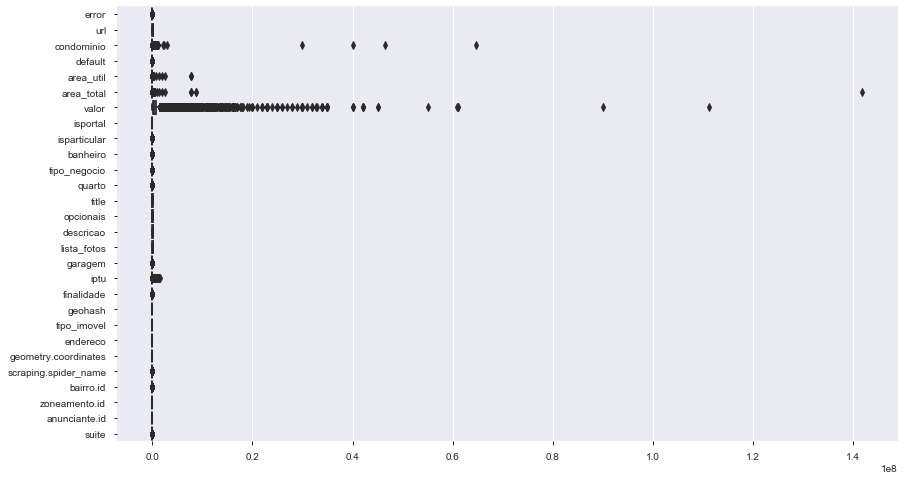

In [423]:
#Boxplot for see the presence of outliers
plt.subplots(figsize=(14,8))
sns.boxplot(data=box, orient='h', palette="Oranges");

In [444]:
box = data.drop(columns=['data_inclusao'])

In [446]:
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

The cumulative variance: 


Dimension 1    0.8716
Dimension 2    0.9575
Dimension 3    0.9947
Name: Explained Variance, dtype: float64

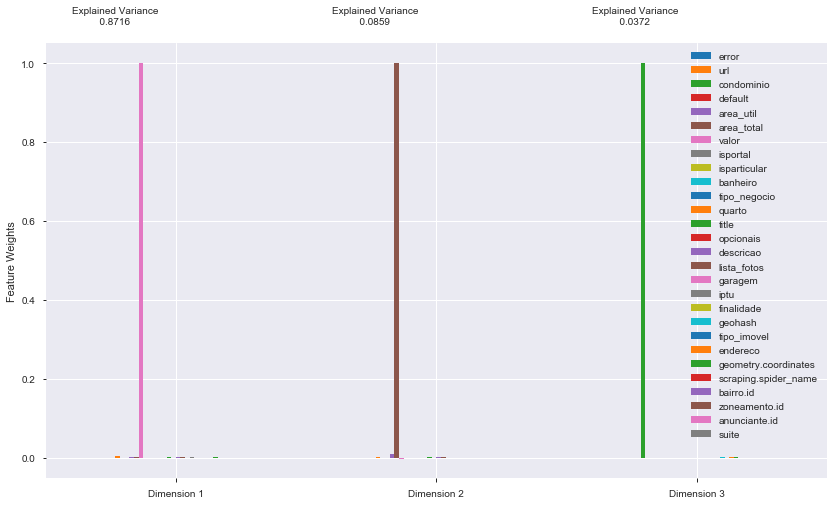

In [447]:
#Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=3, random_state=1).fit(box)

# Generate PCA results plot
pca_results = pca_results(box, pca)

print("The cumulative variance: ")
display(pca_results['Explained Variance'].cumsum())